In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def create_ring(plus, cross, freq, t, phasestart=np.pi/2, phasediff=0, ndots=36, filename=None):
    phase = phasestart + 2*np.pi*freq*t
    points0 = np.zeros((2, ndots))
    points0[0, :] = np.sin(2*np.pi*np.arange(ndots)/ndots)
    points0[1, :] = np.cos(2*np.pi*np.arange(ndots)/ndots)
    points1 = np.zeros((2, ndots))
    points1[0, :] = points0[0, :] + 0.5*(plus*np.cos(phase)*points0[0, :] + cross*np.cos(phase + phasediff)*points0[1, :])
    points1[1, :] = points0[1, :] + 0.5*(-plus*np.cos(phase)*points0[1, :] + cross*np.cos(phase + phasediff)*points0[0, :])
    if filename:
        plt.figure(figsize=[16, 16])
        plt.xlim([-1.5, 1.5])
        plt.ylim([-1.5, 1.5])
        plt.plot(points0[0, :], points0[1, :], 'o', c='royalblue', mfc='none')
        plt.plot(points1[0, :], points1[1, :], 'o', c='royalblue')
        plt.savefig(filename)
    return points1

def create_gif(filenames, duration, filename='./Circle.gif'):
    images = []
    for f in filenames:
        images.append(imageio.imread(f))
    imageio.mimsave(filename, images, 'GIF', duration=duration)

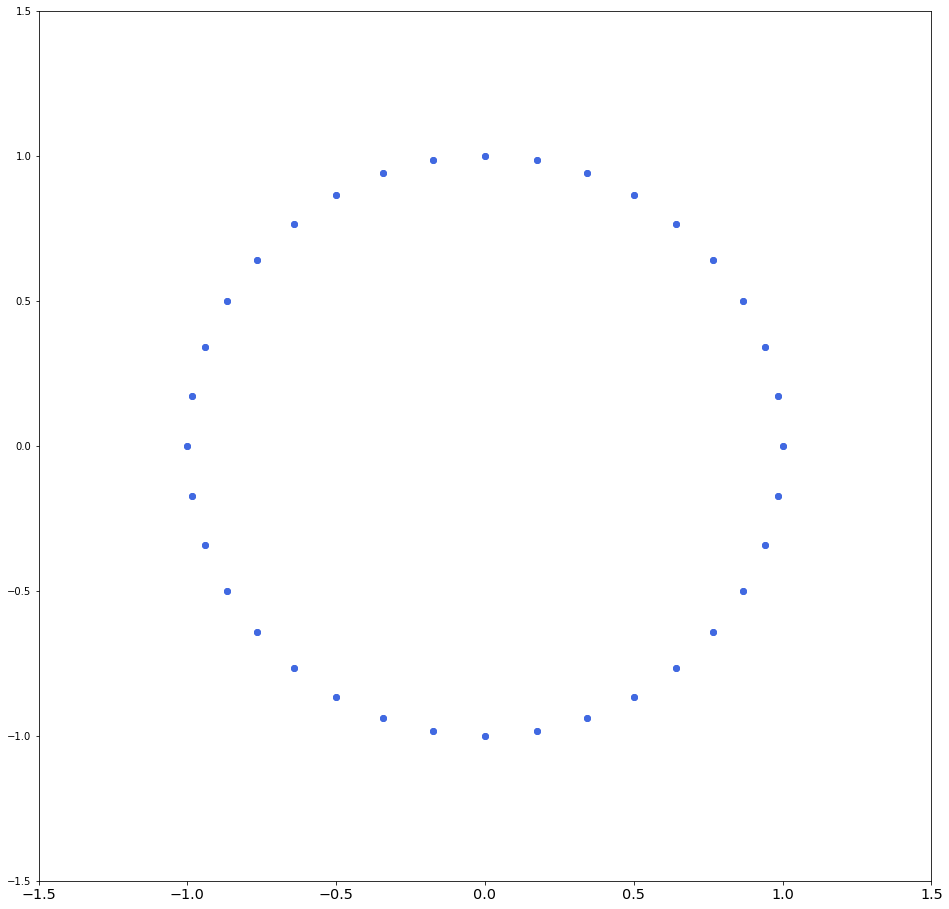

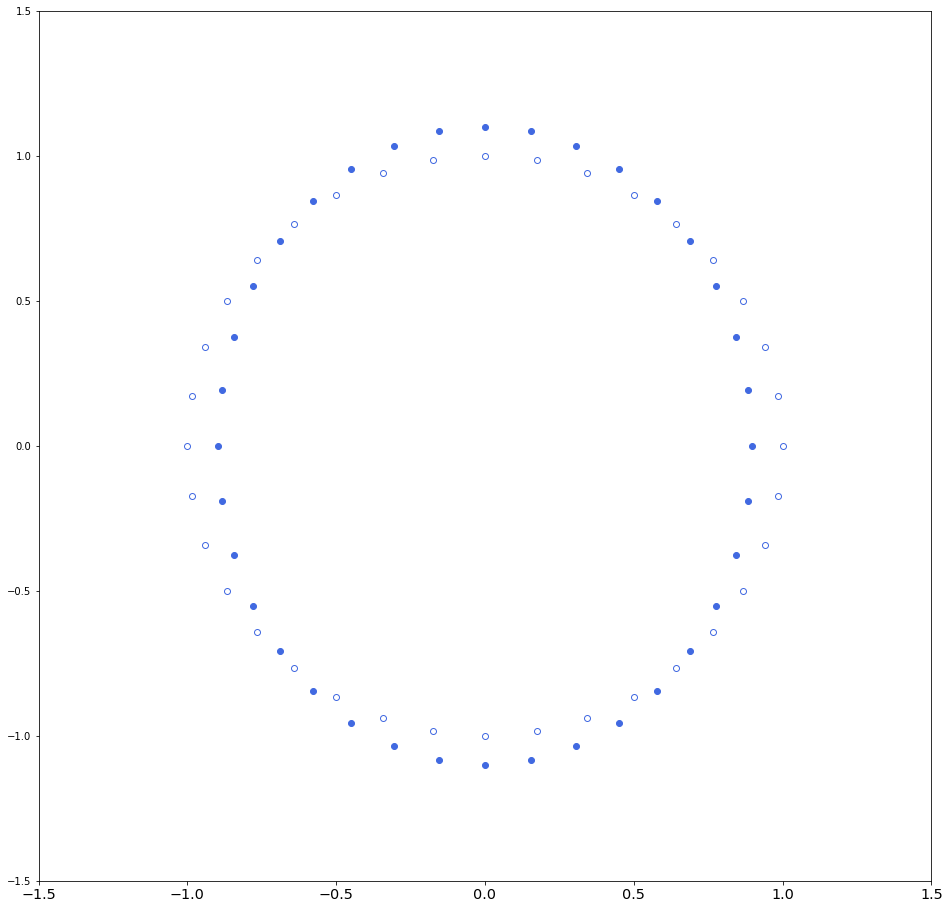

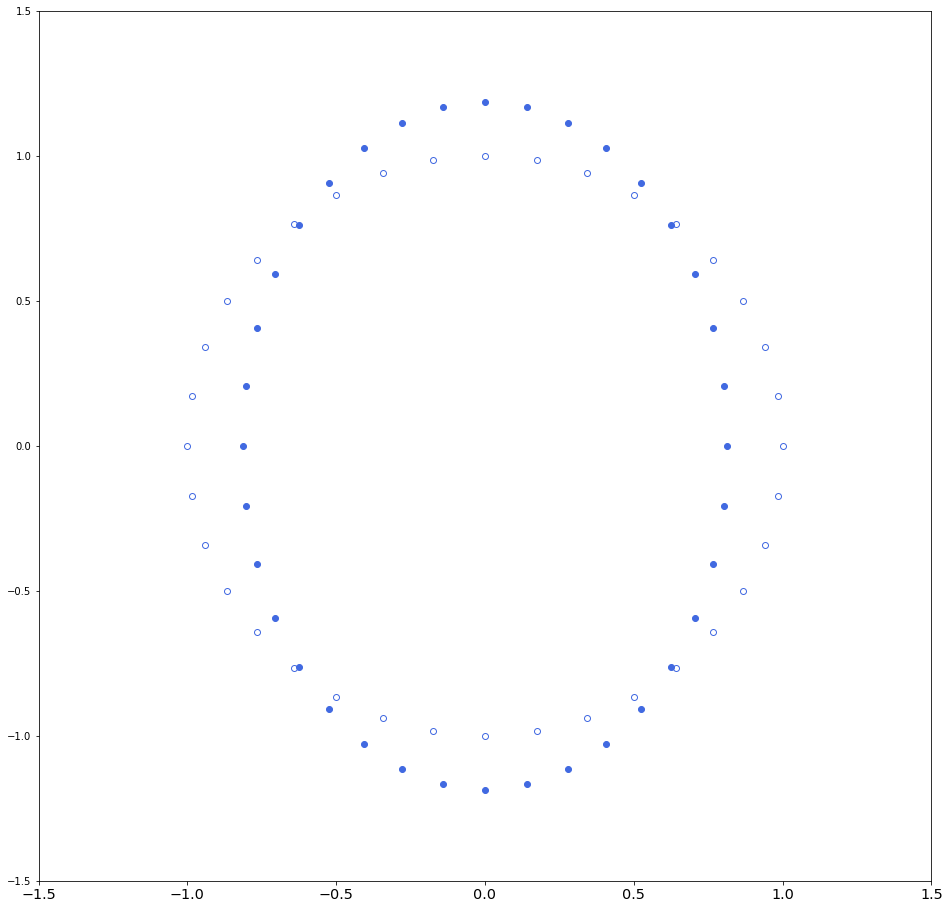

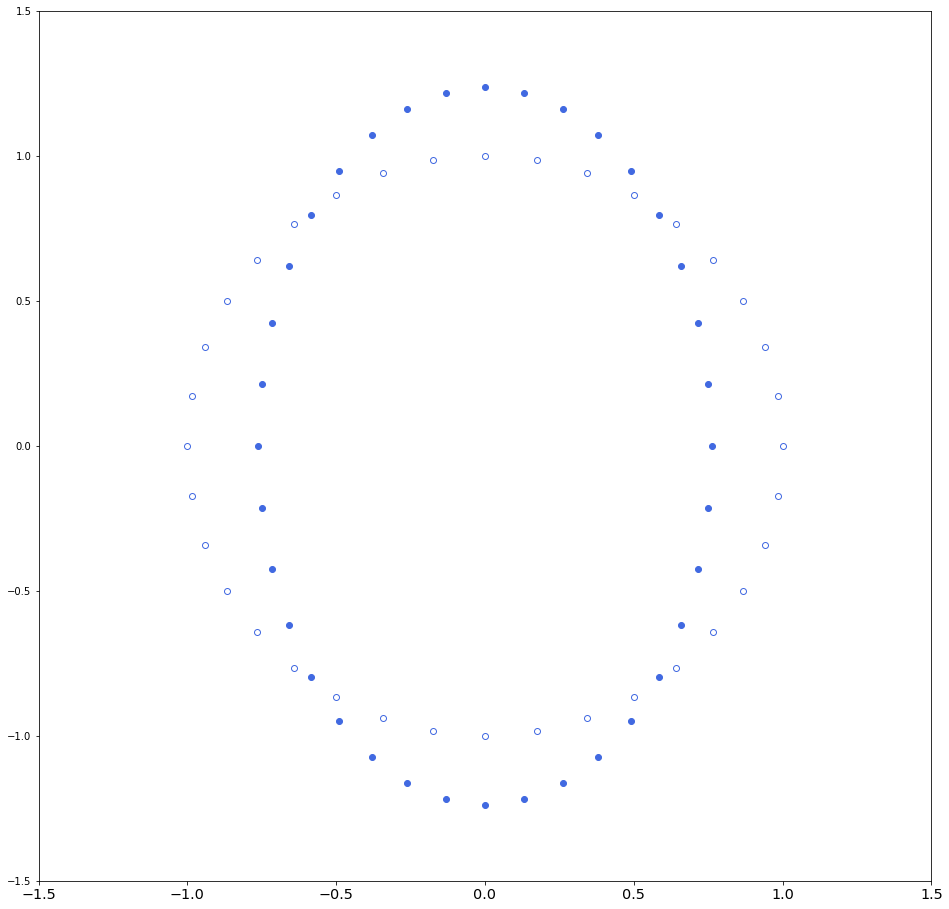

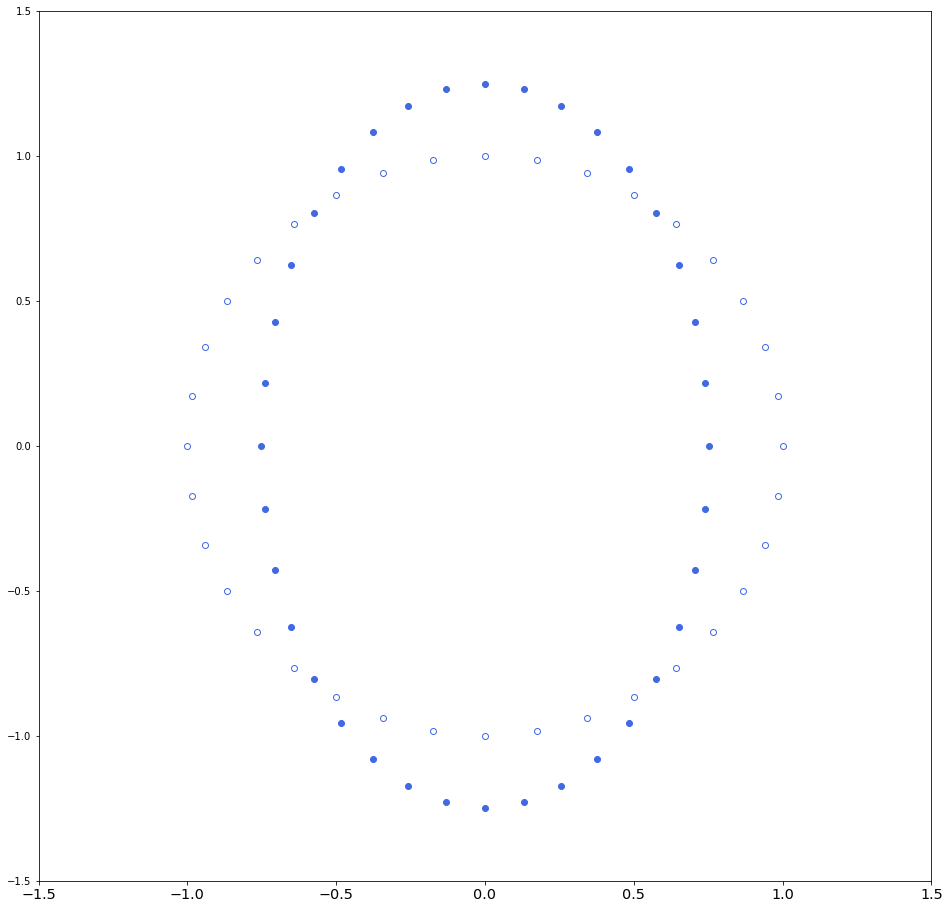

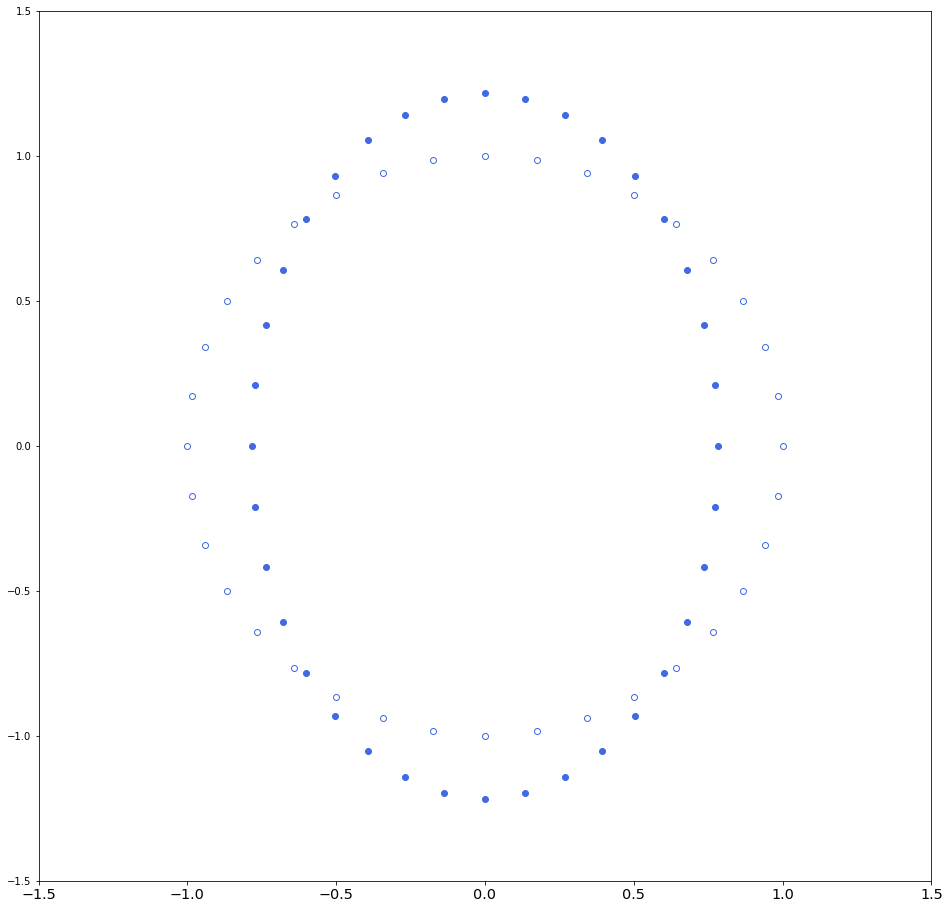

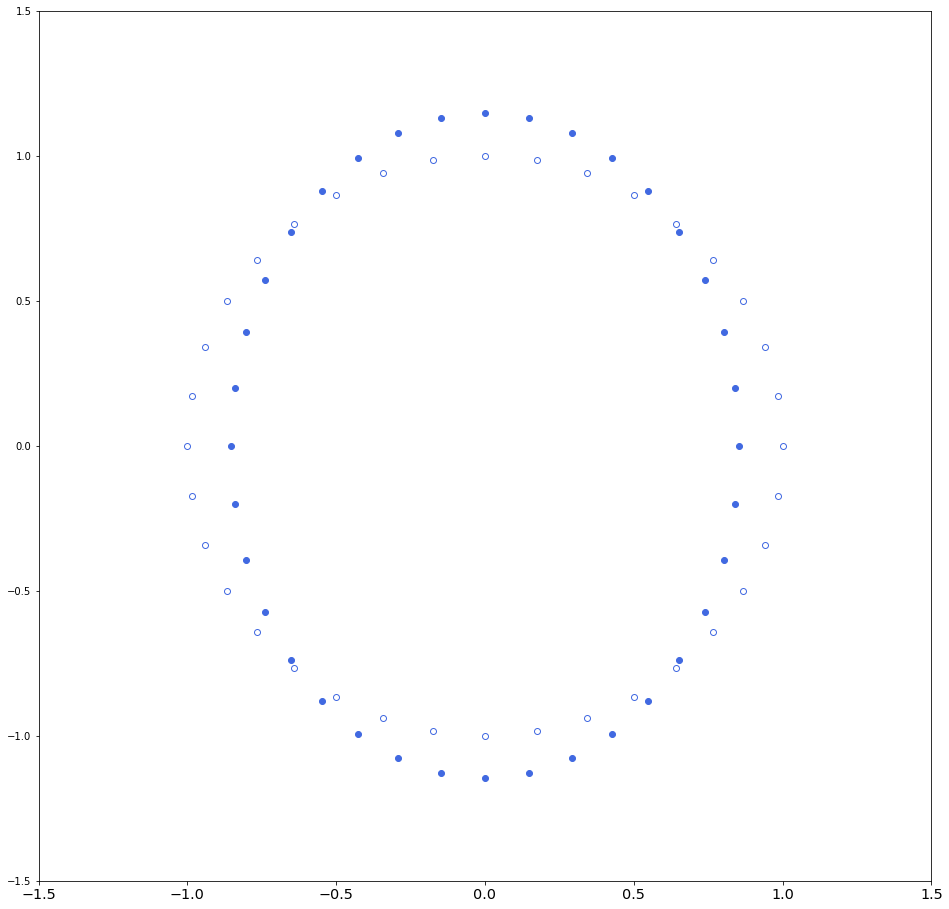

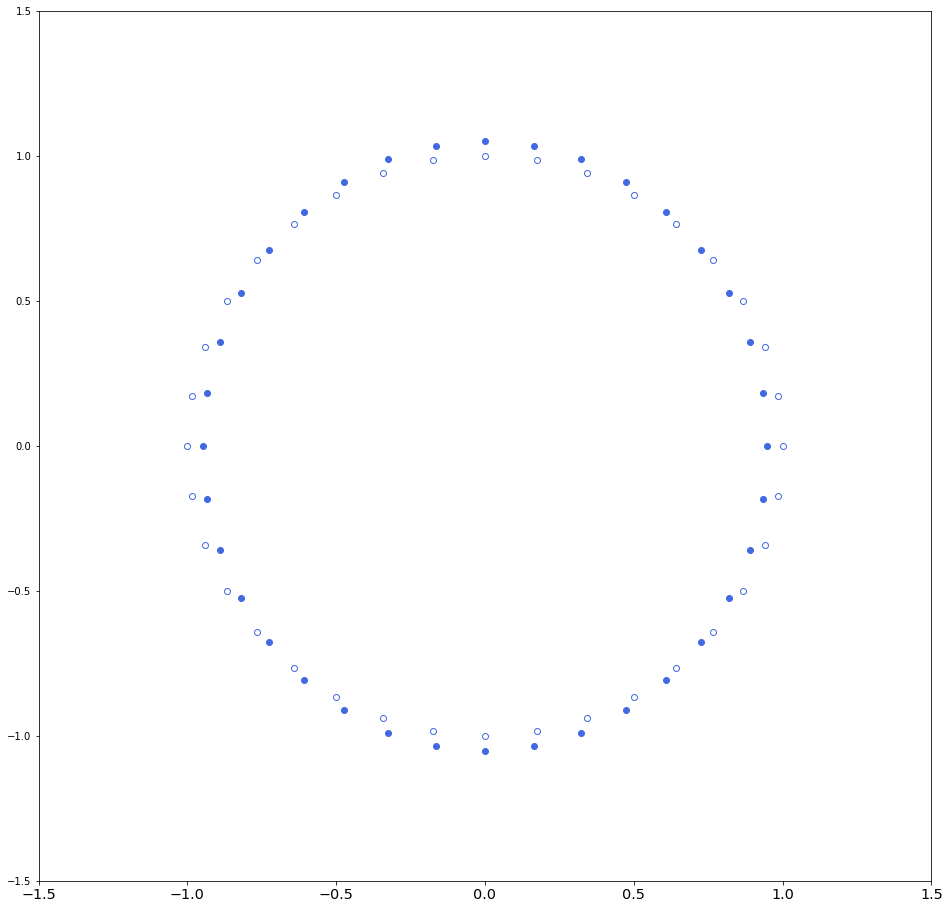

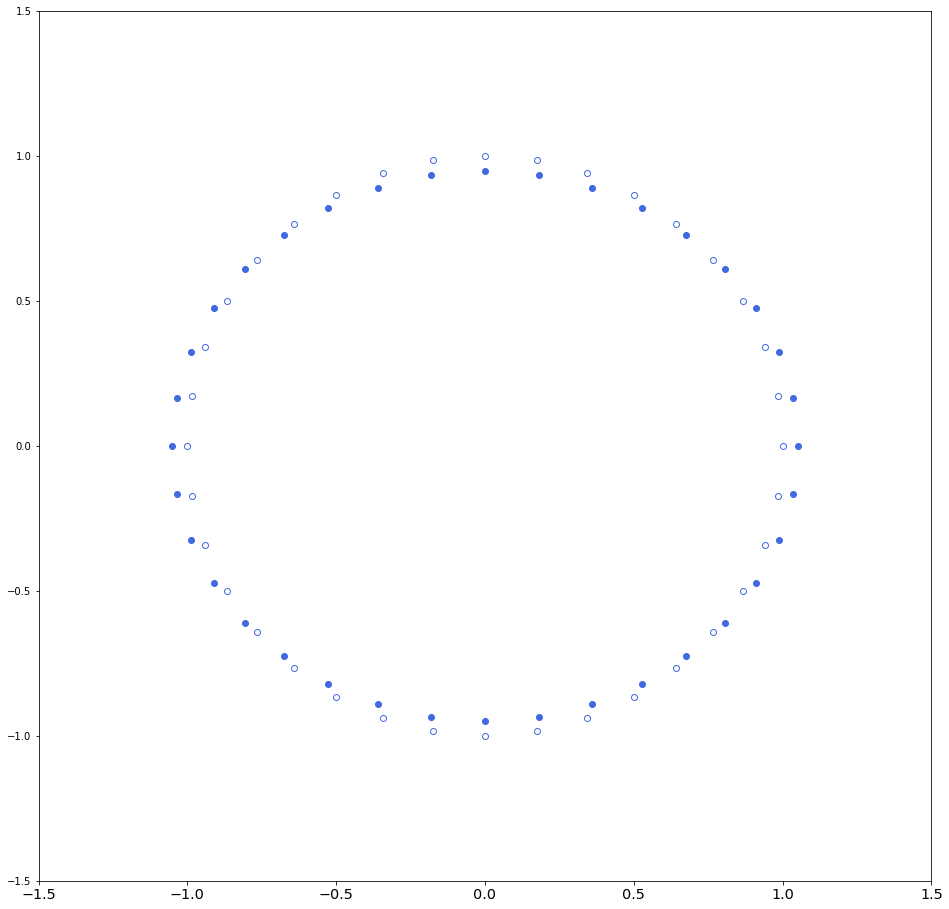

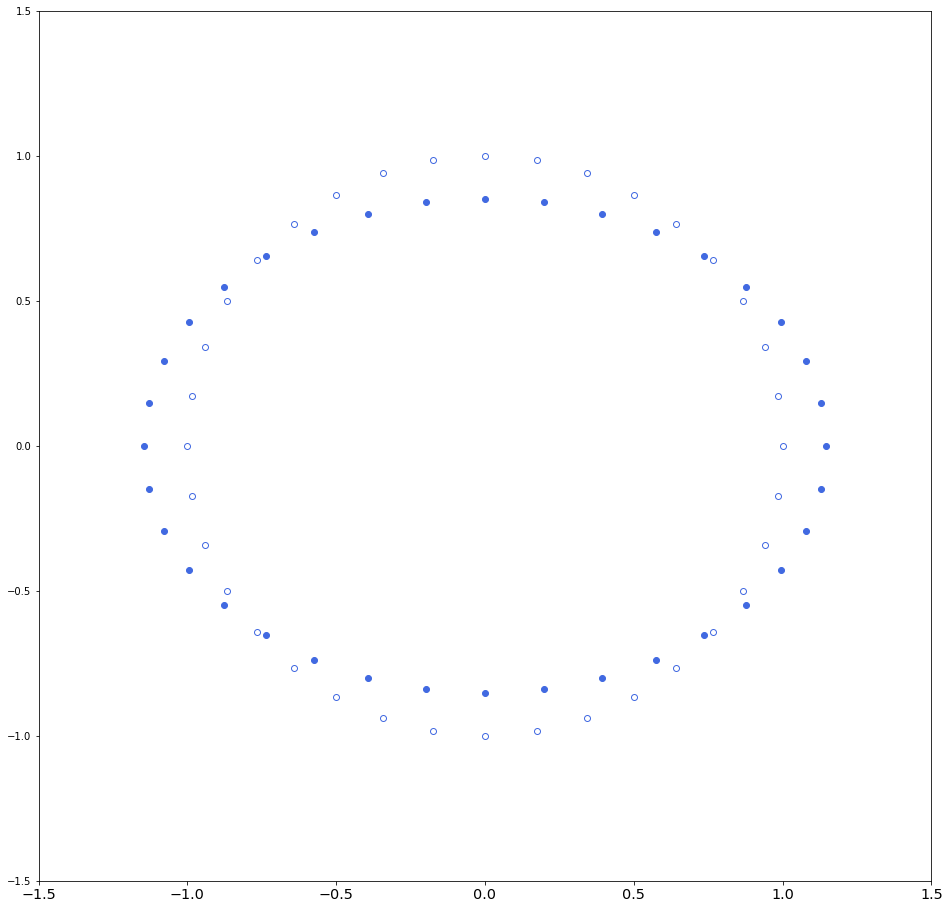

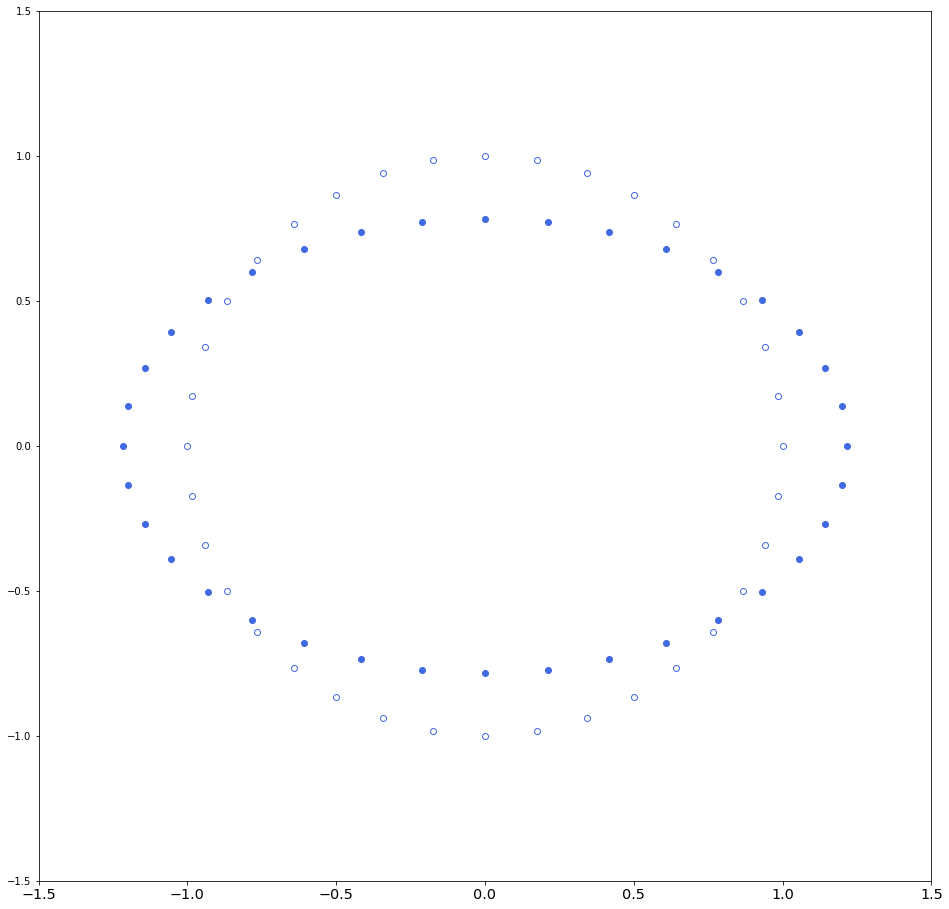

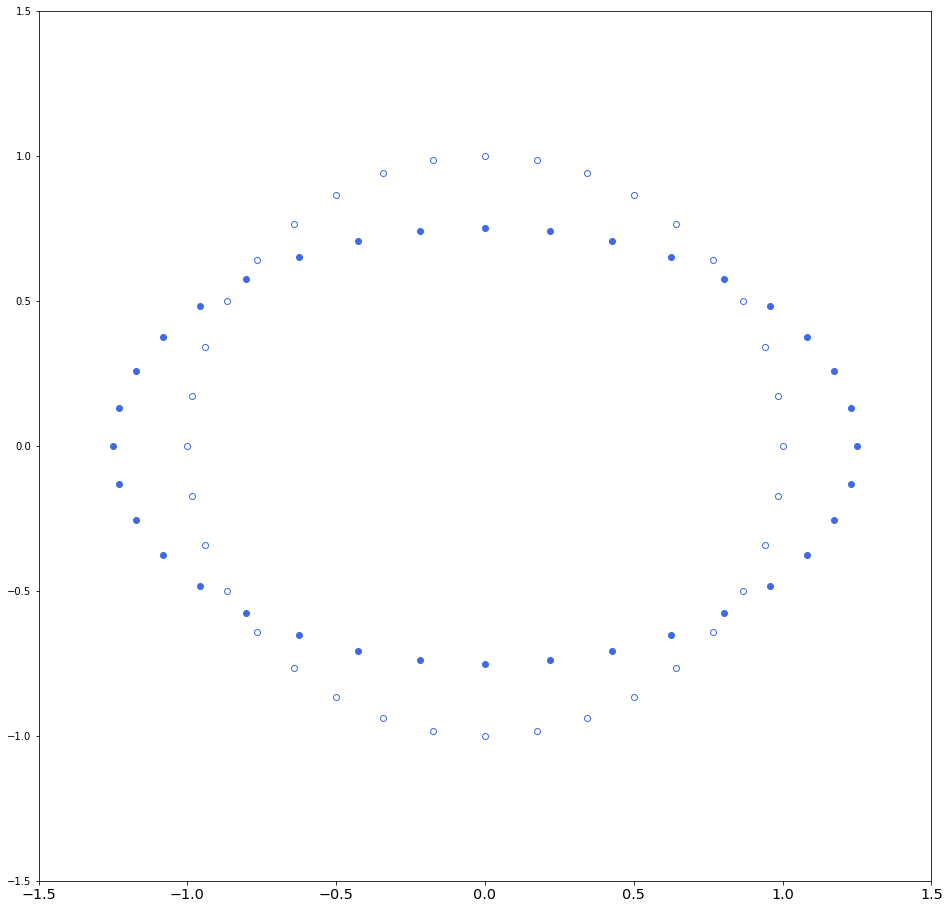

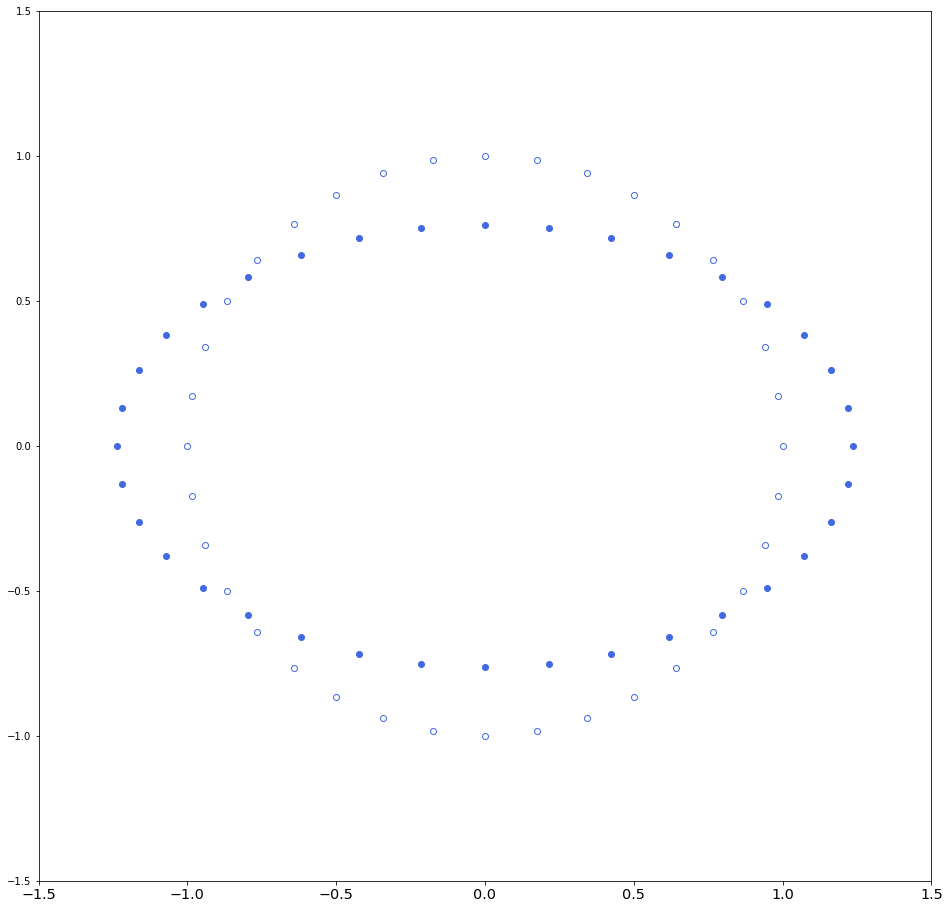

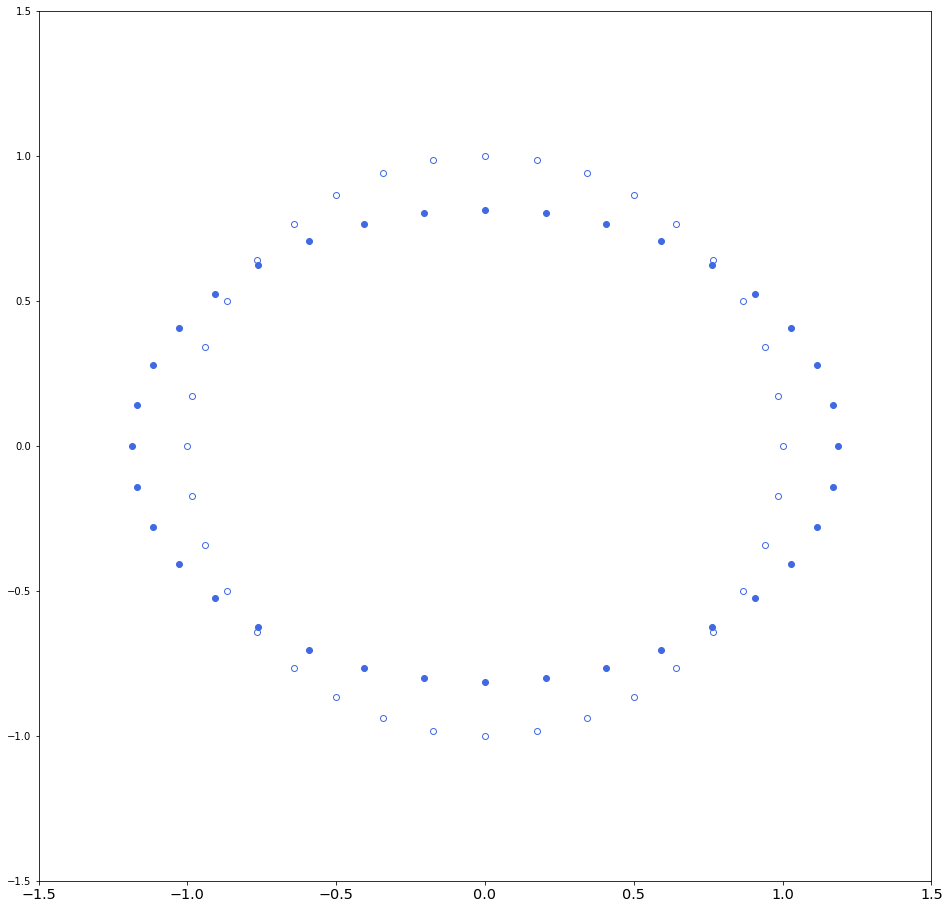

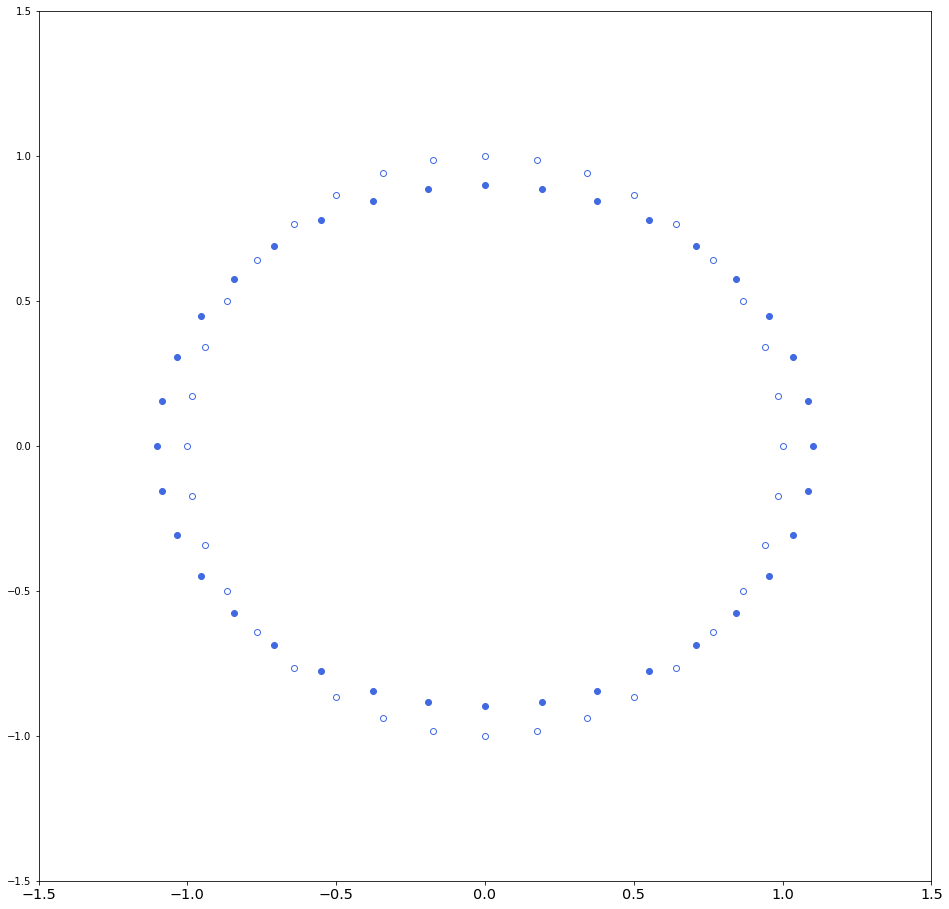

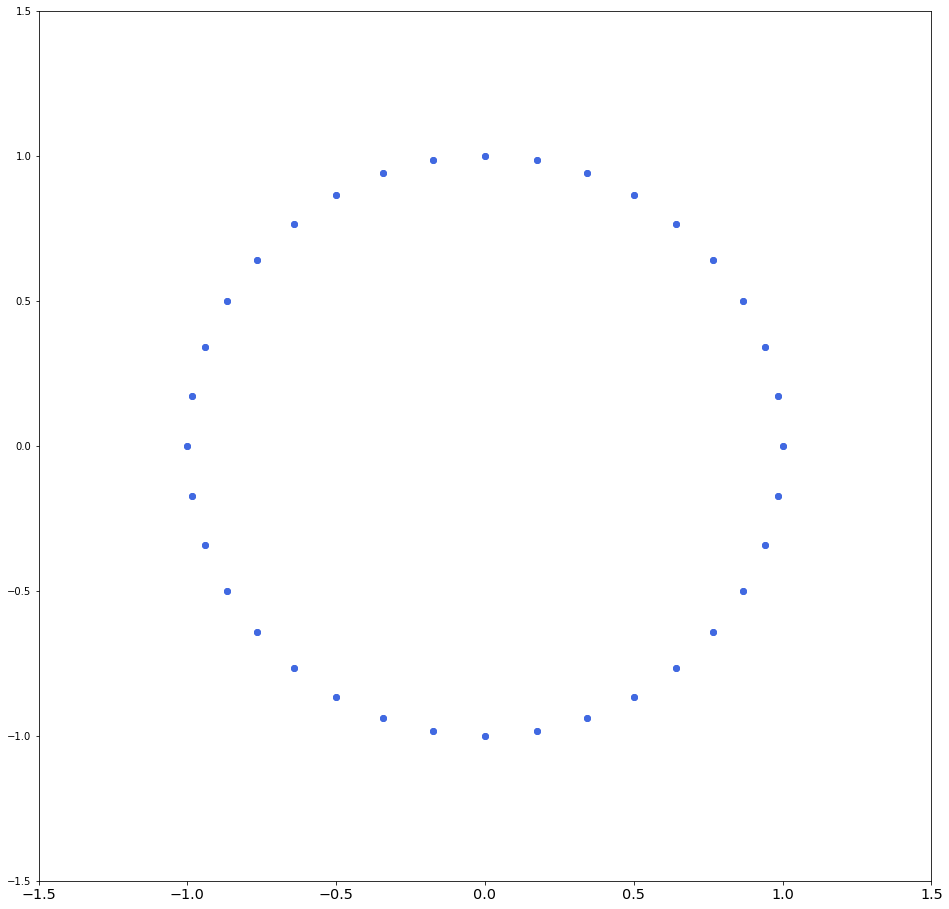

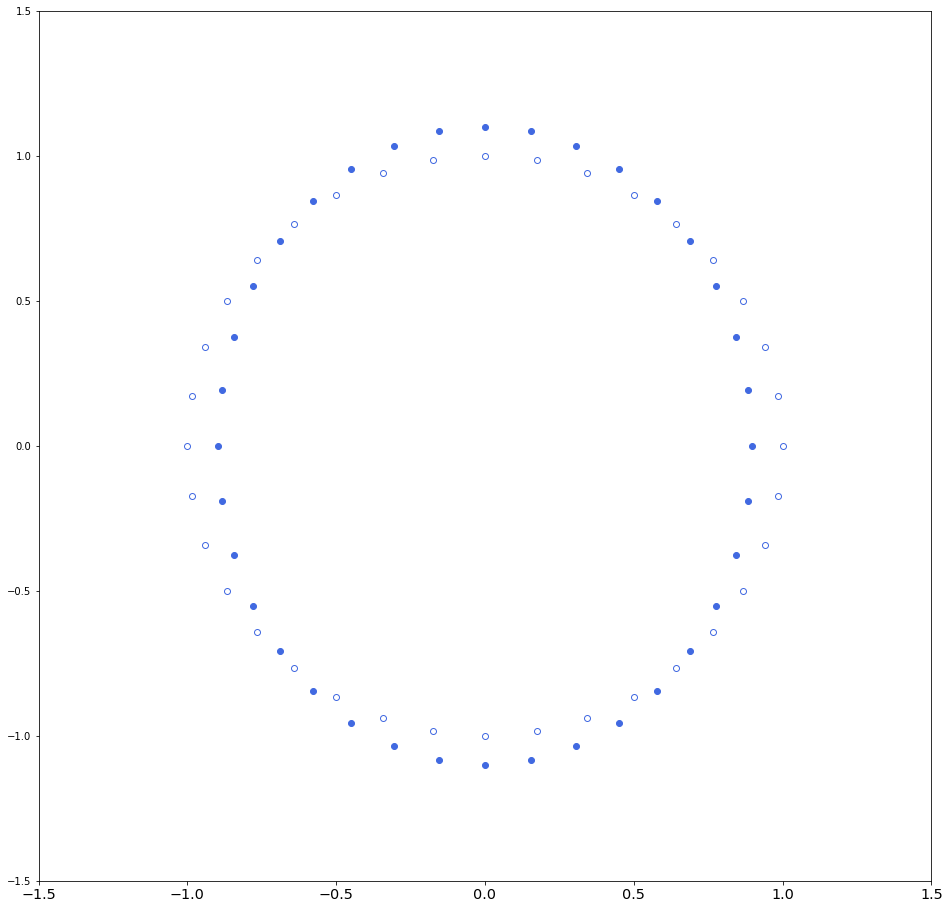

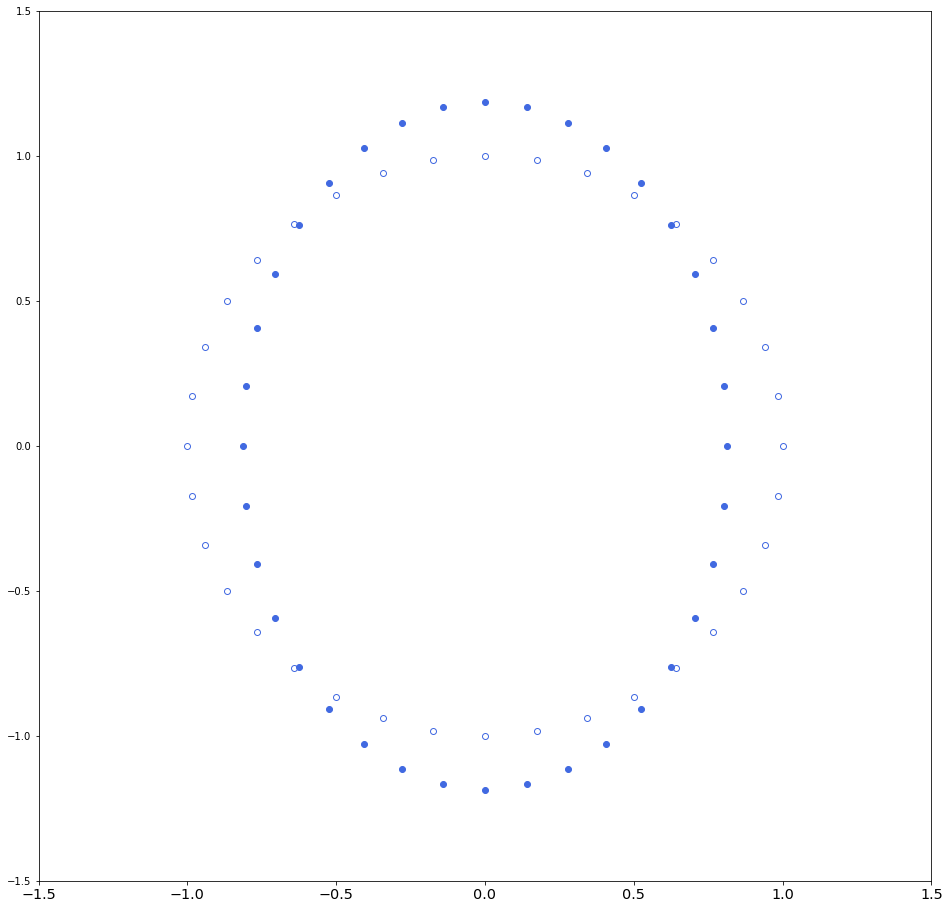

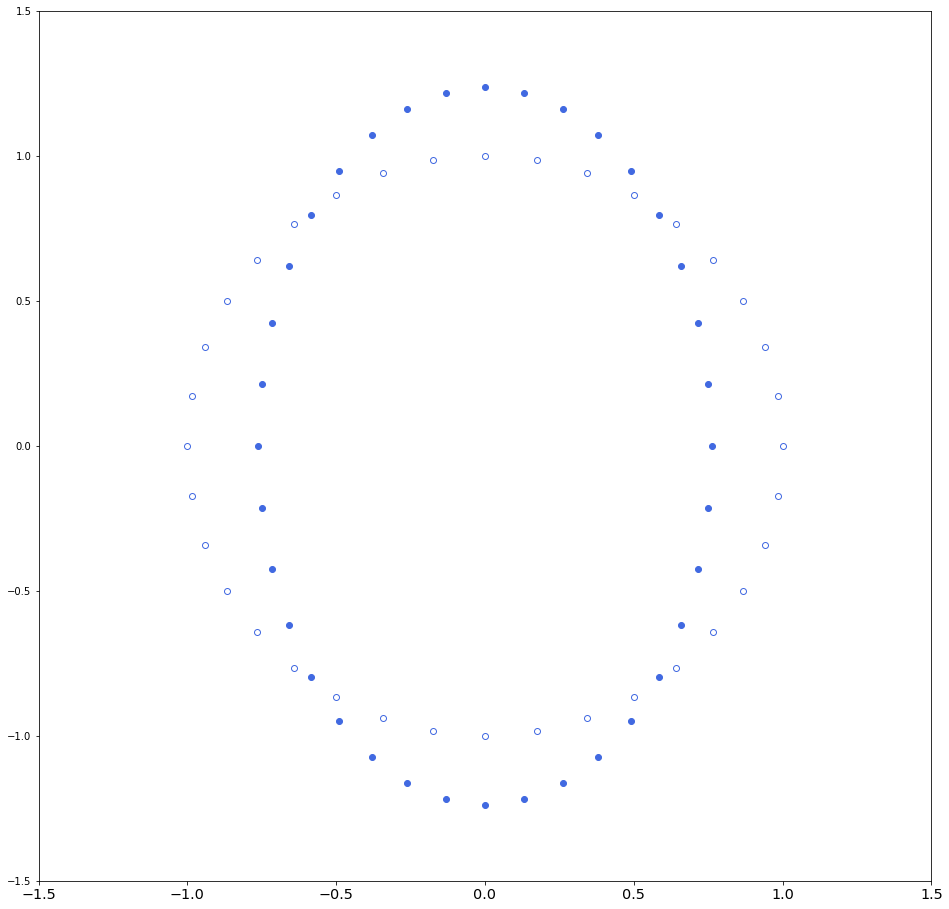

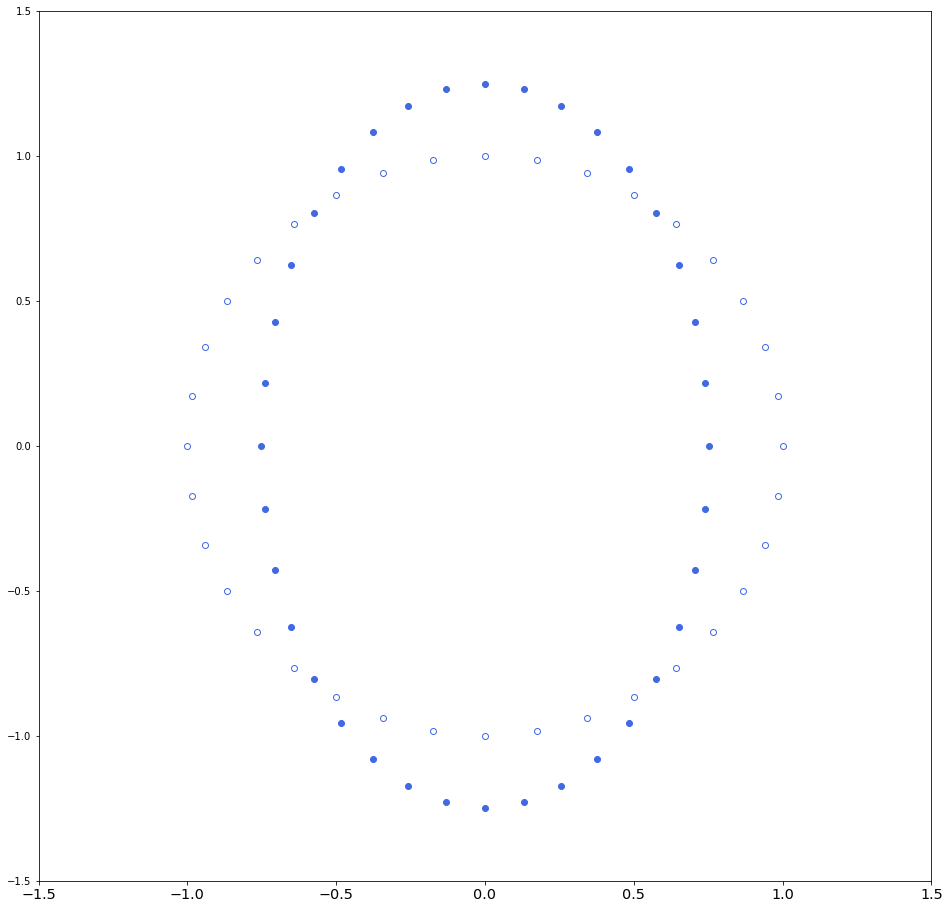

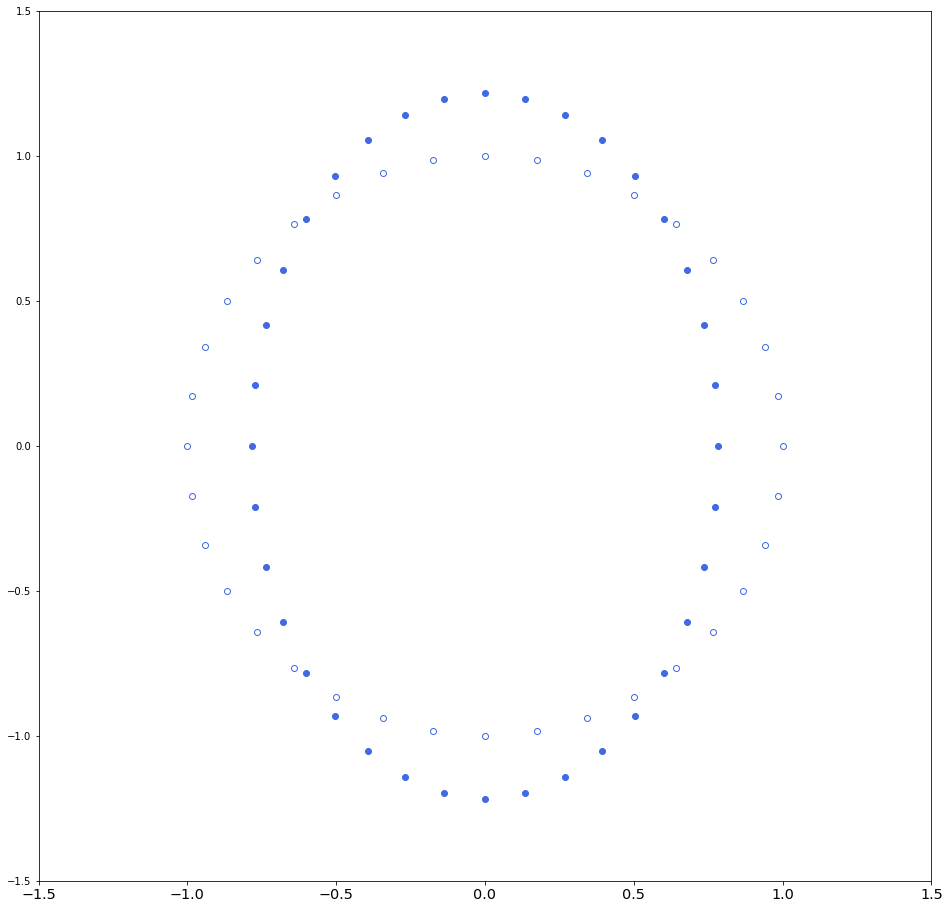

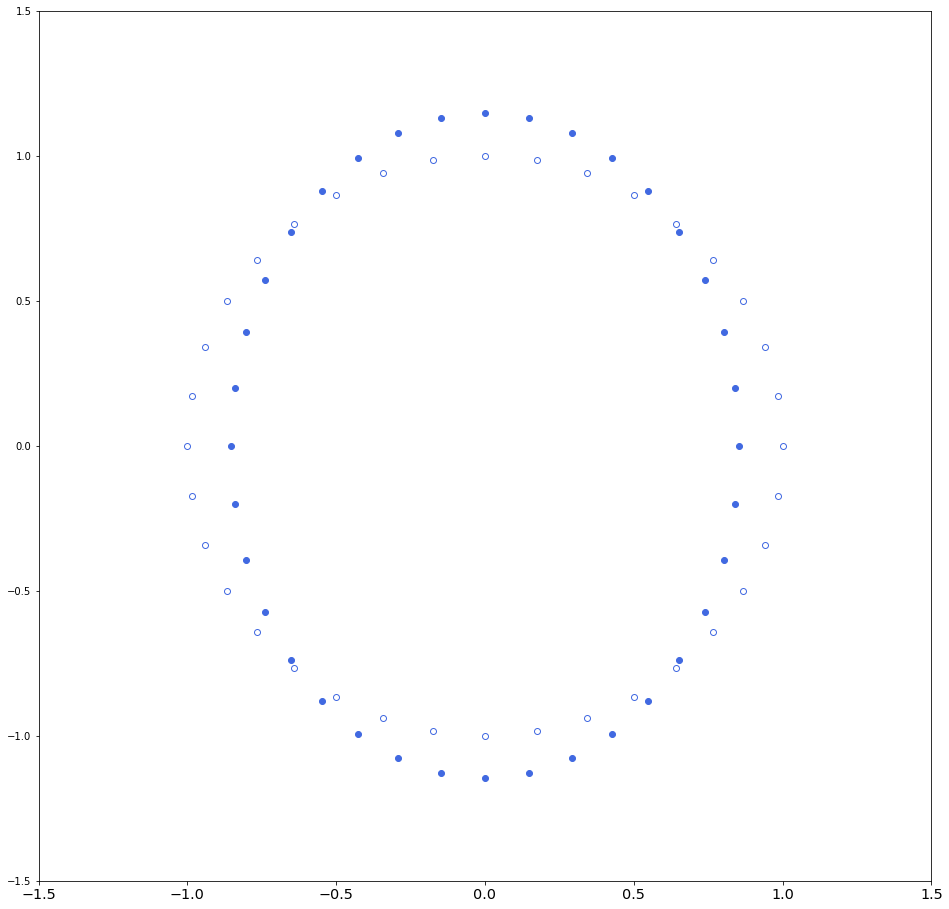

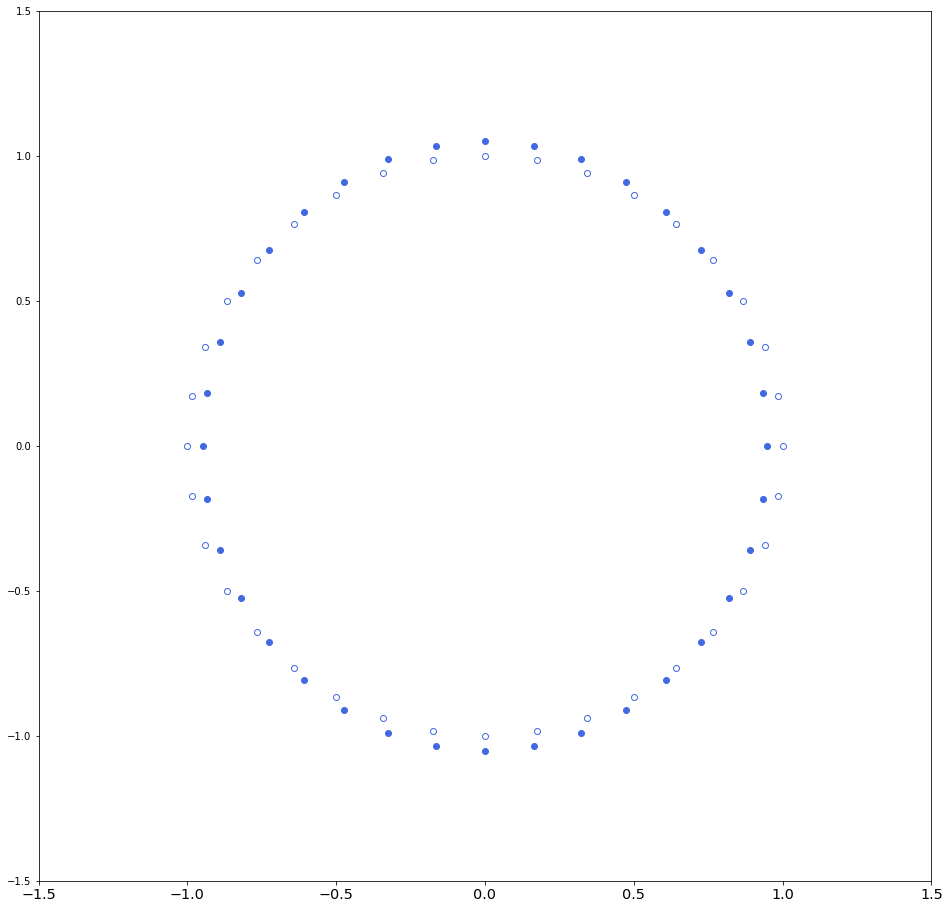

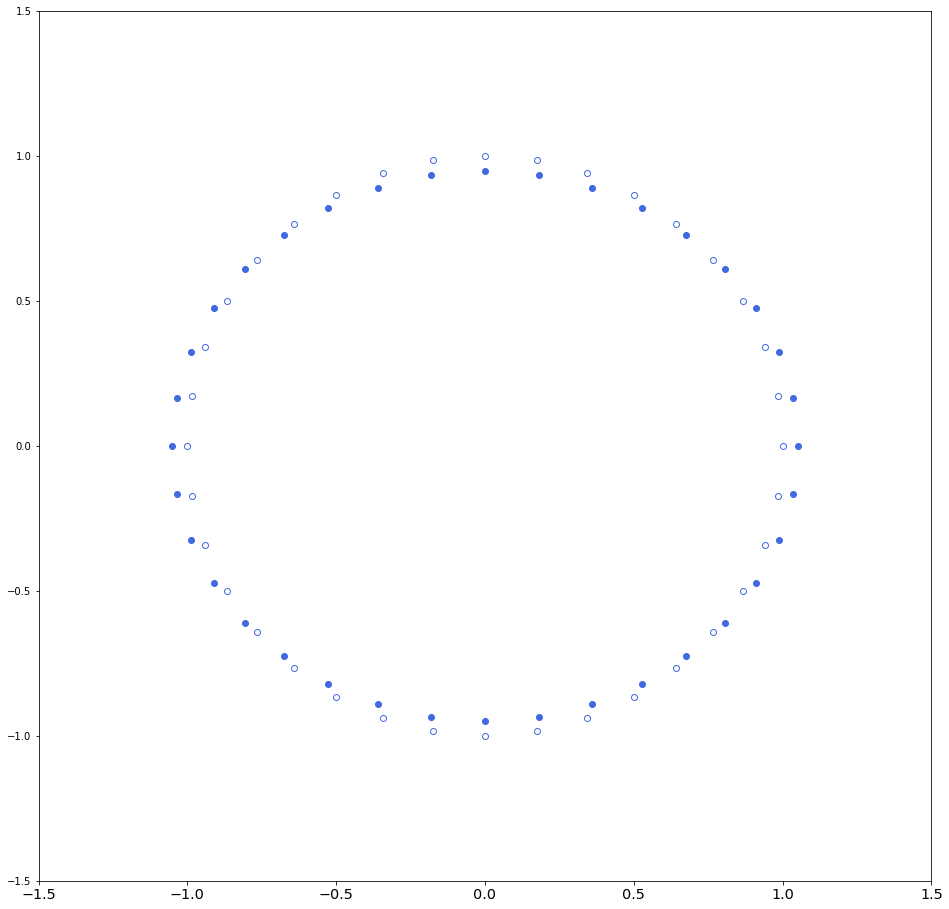

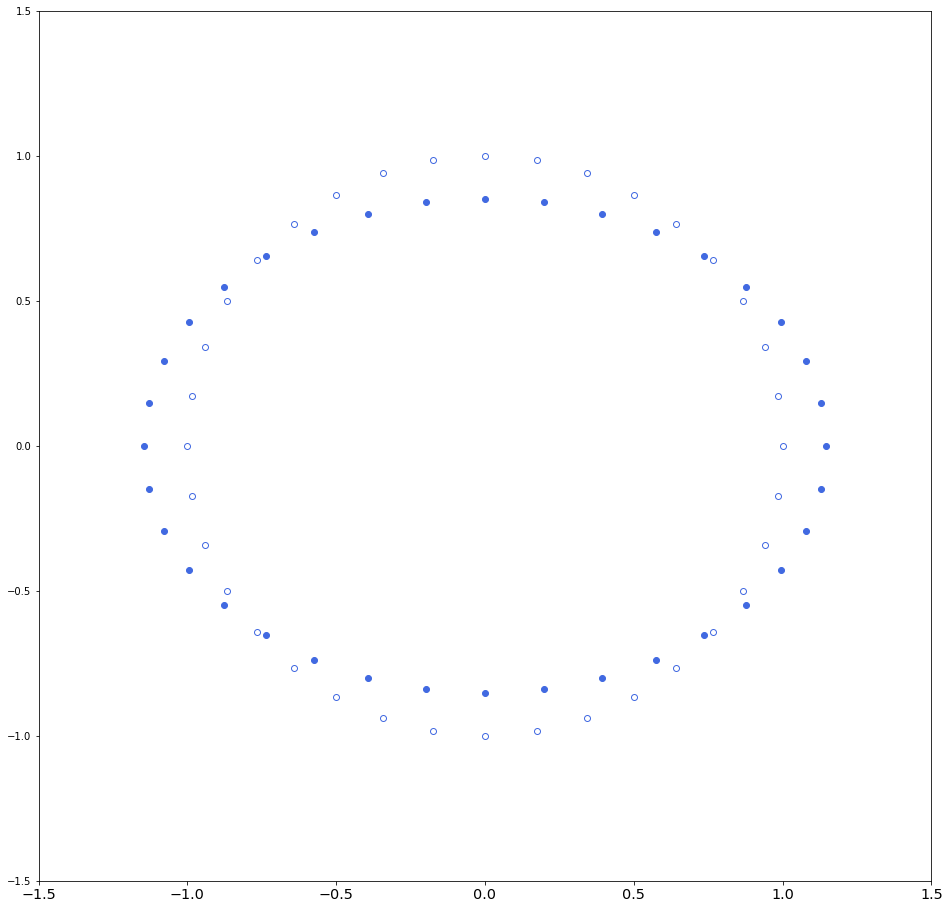

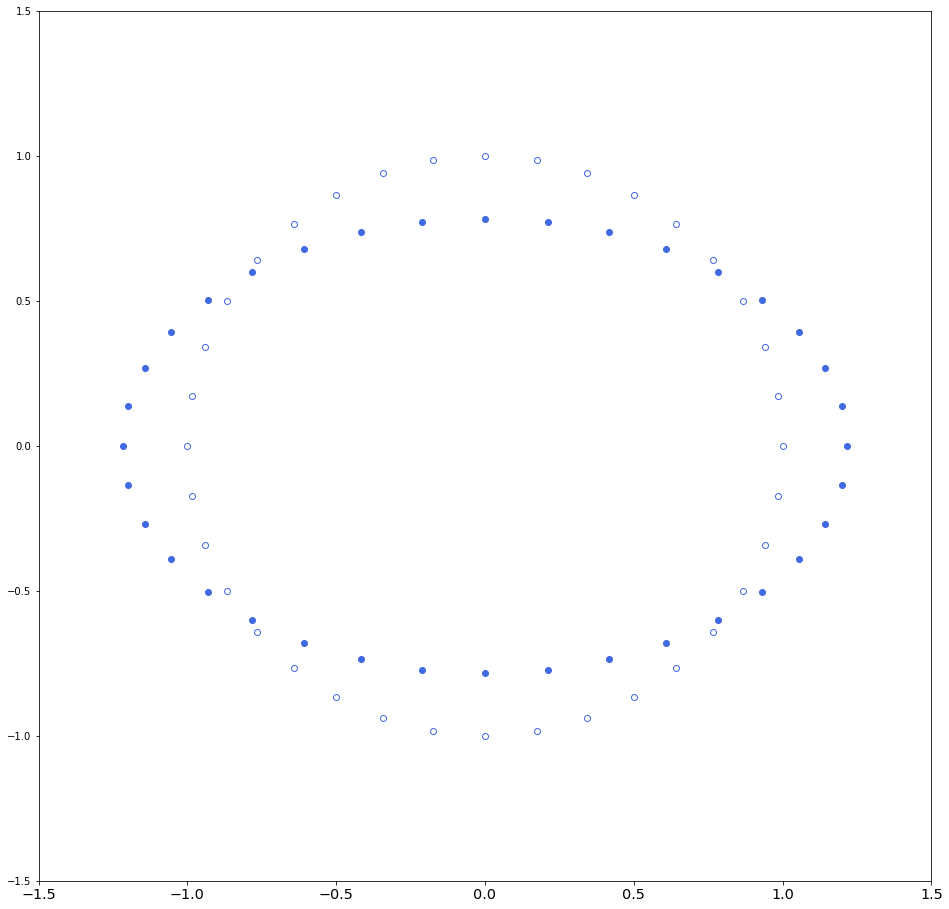

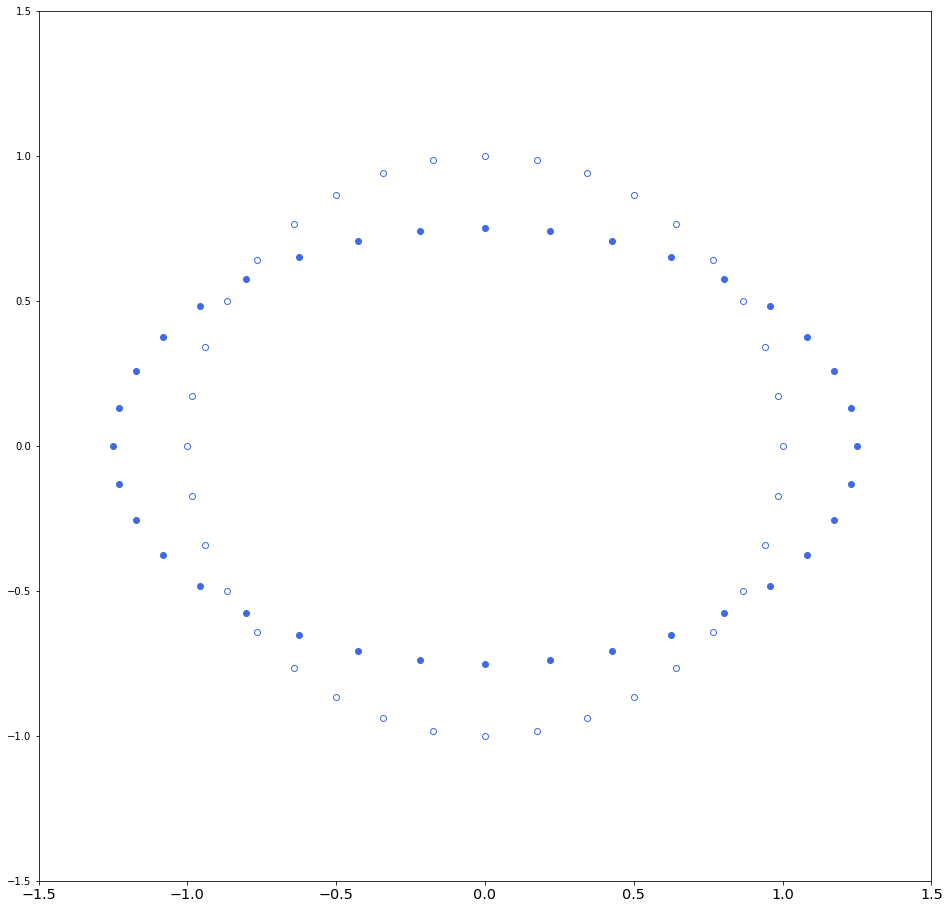

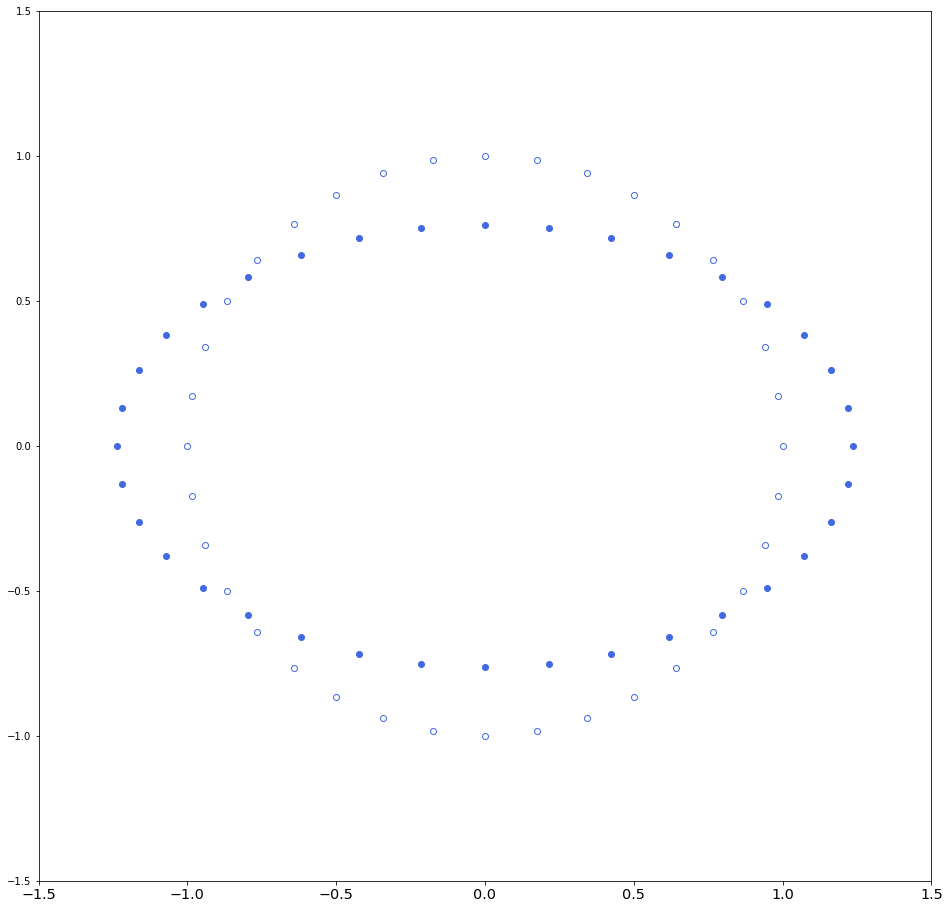

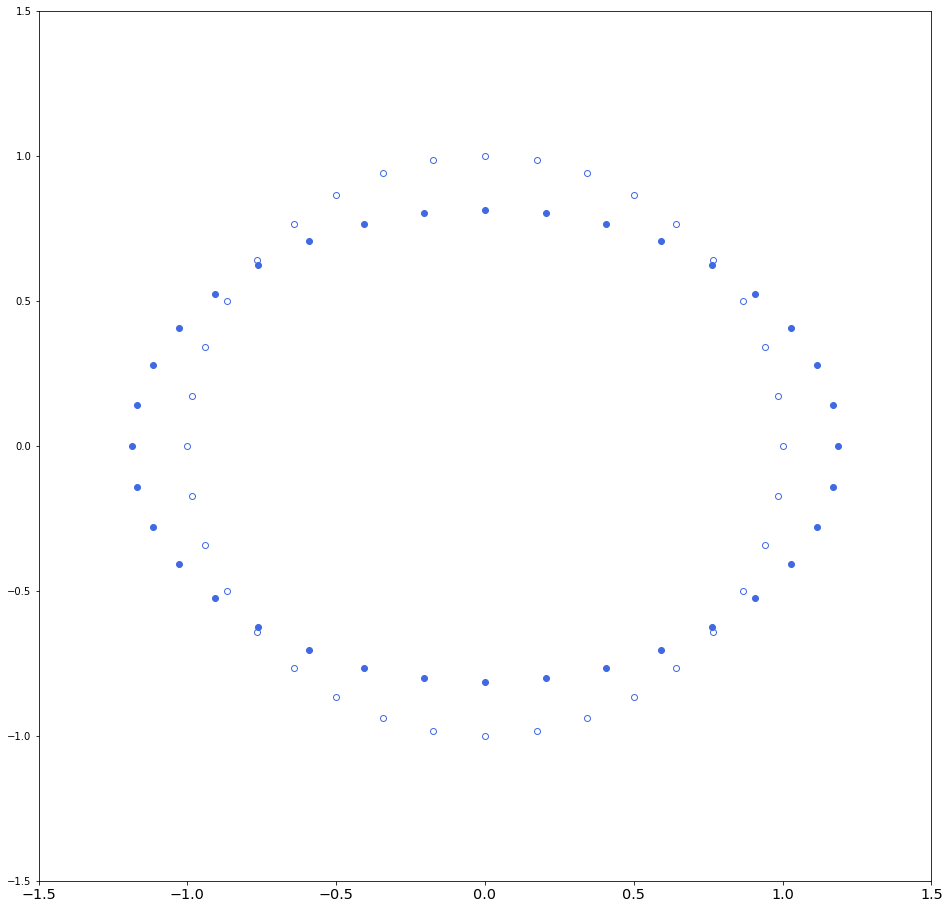

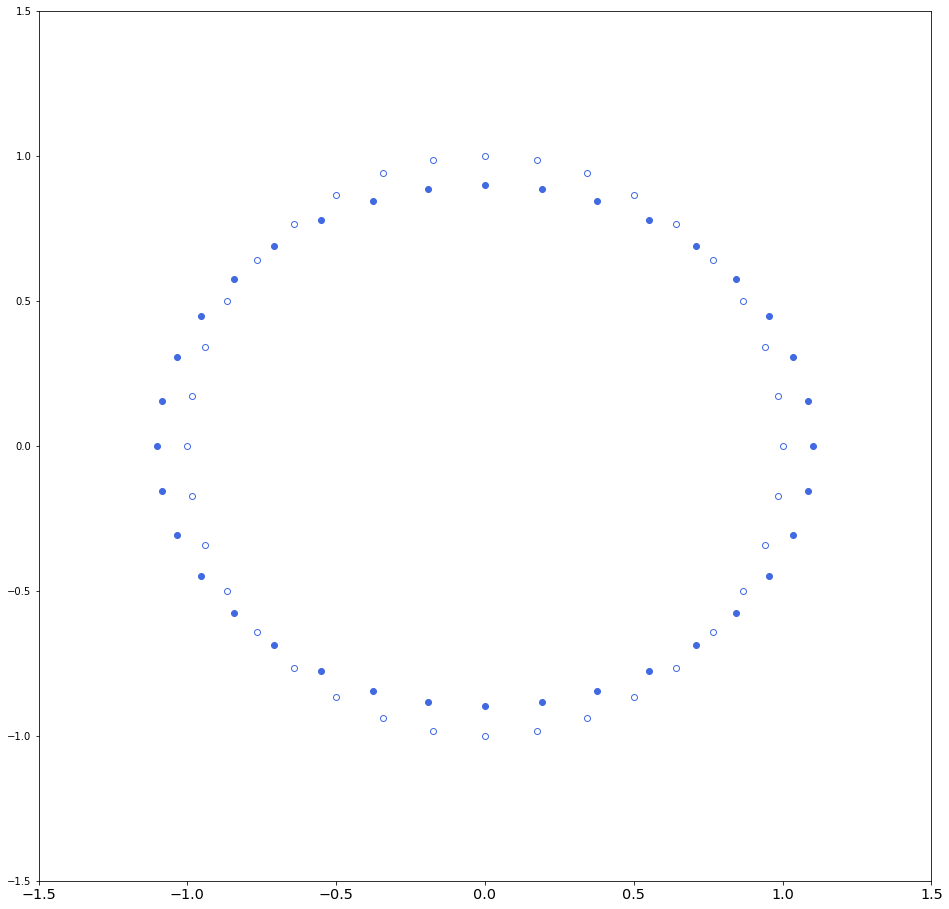

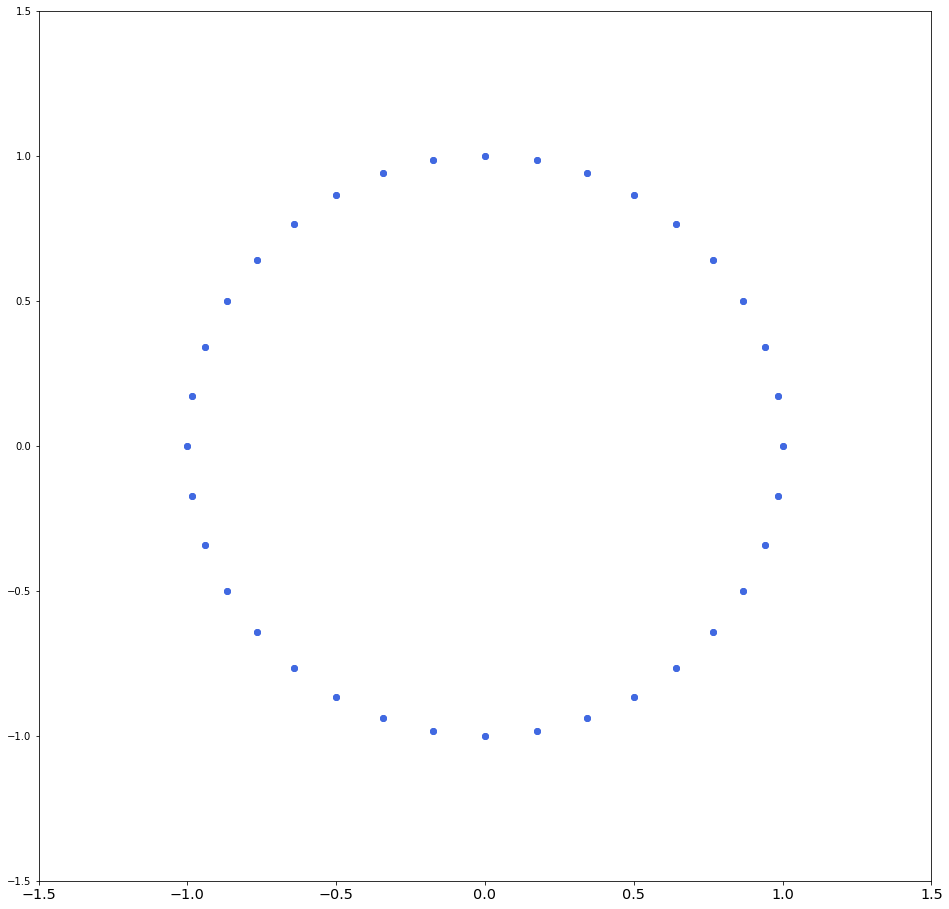

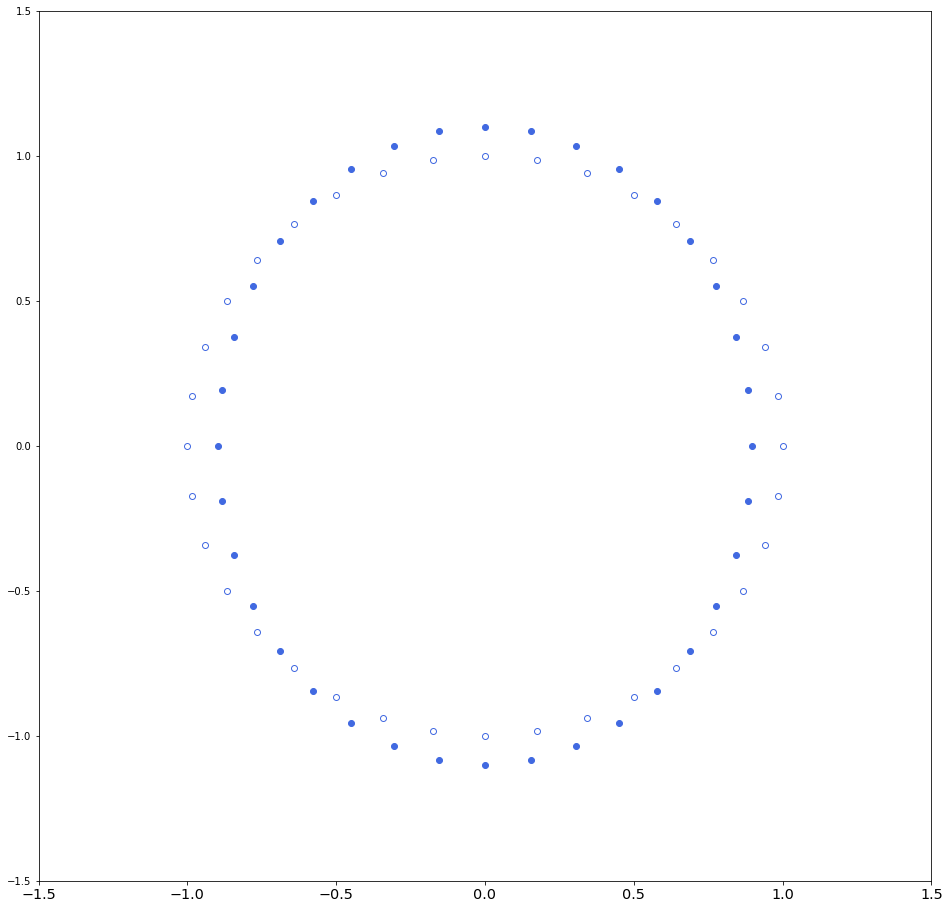

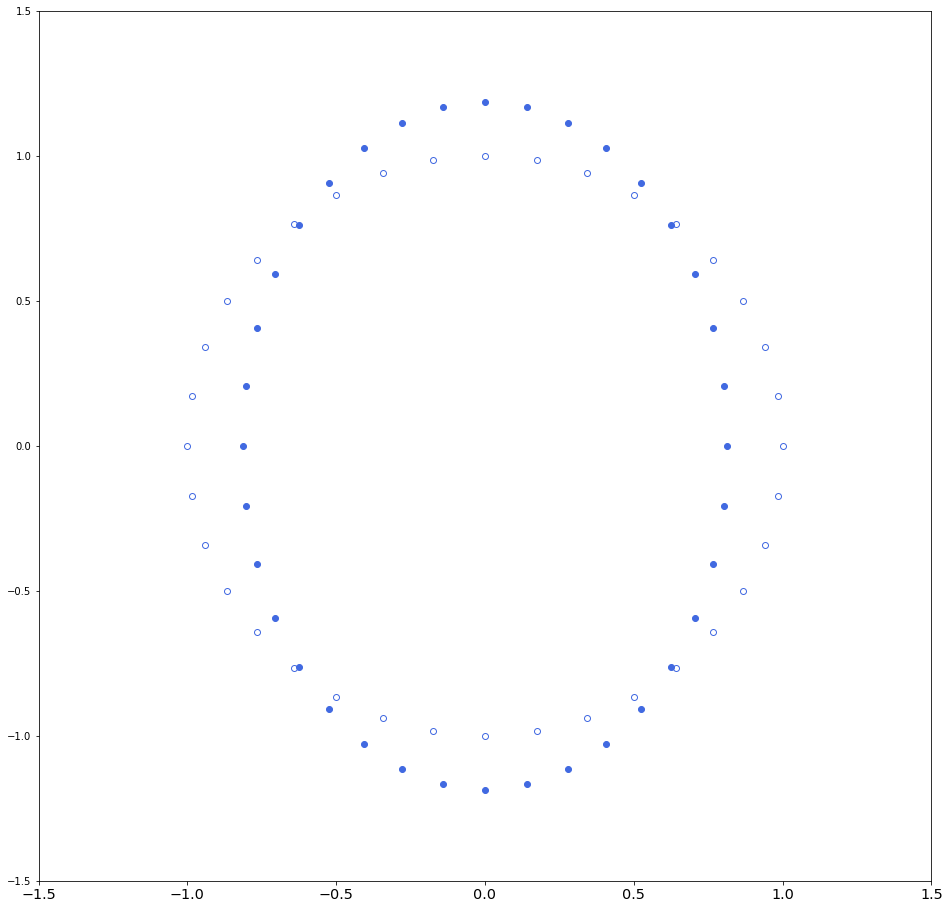

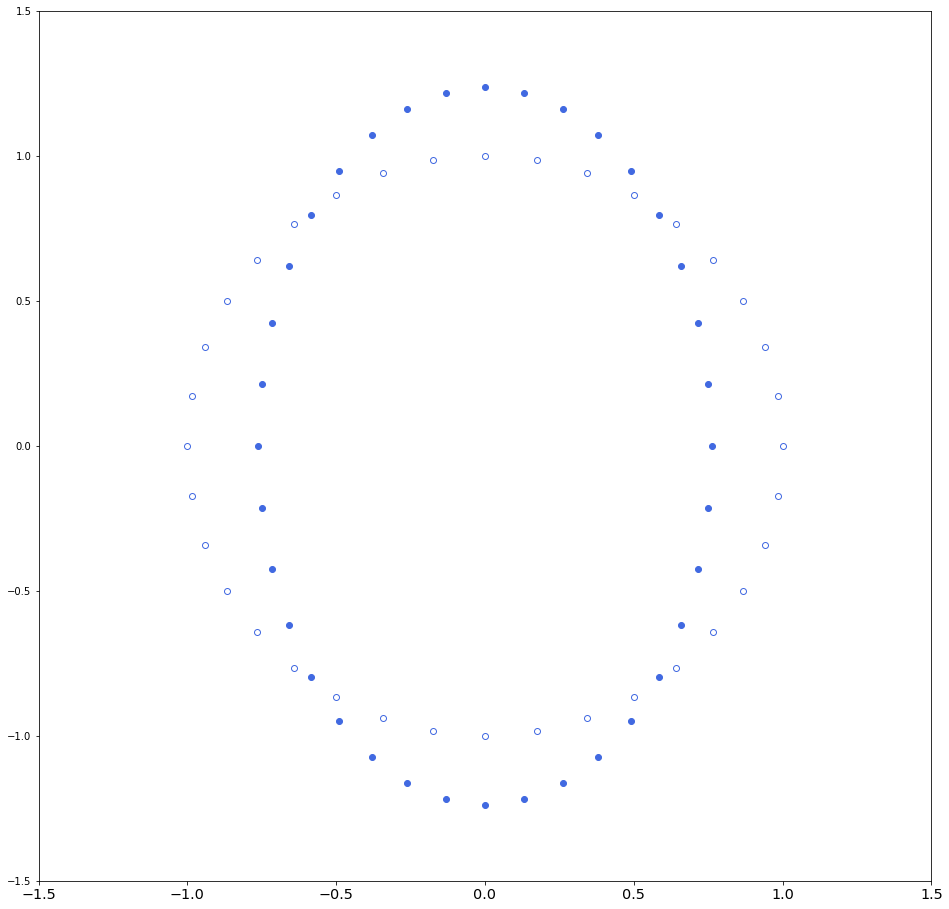

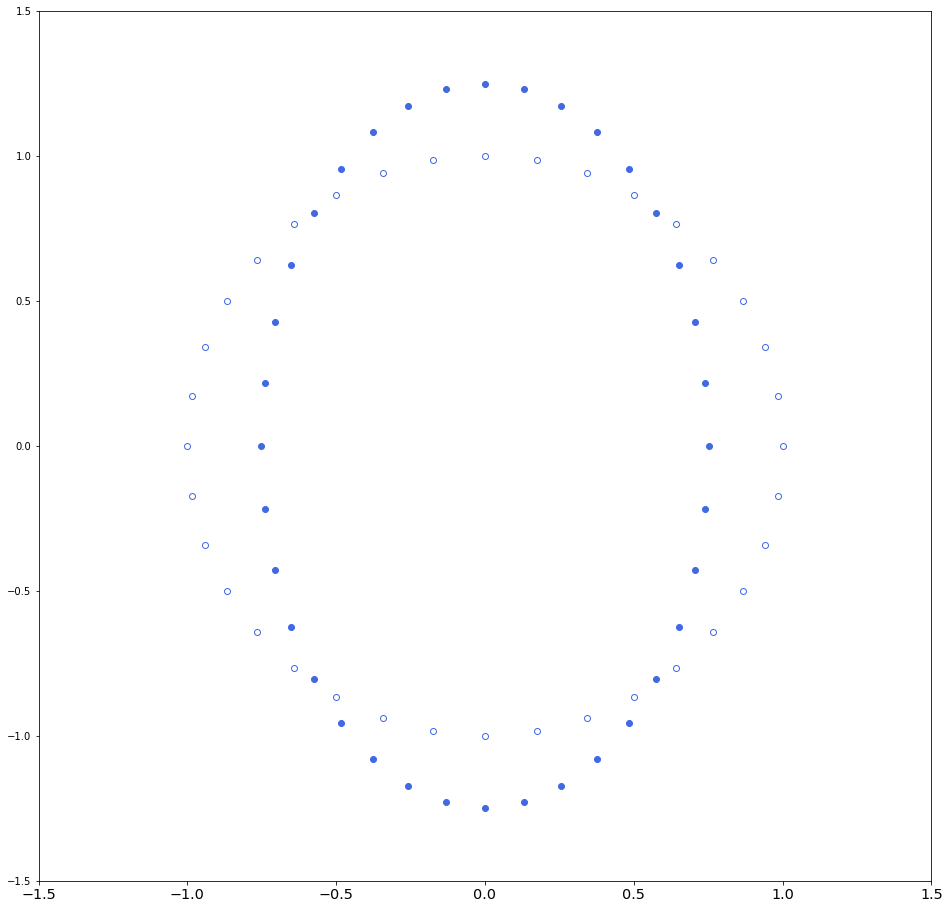

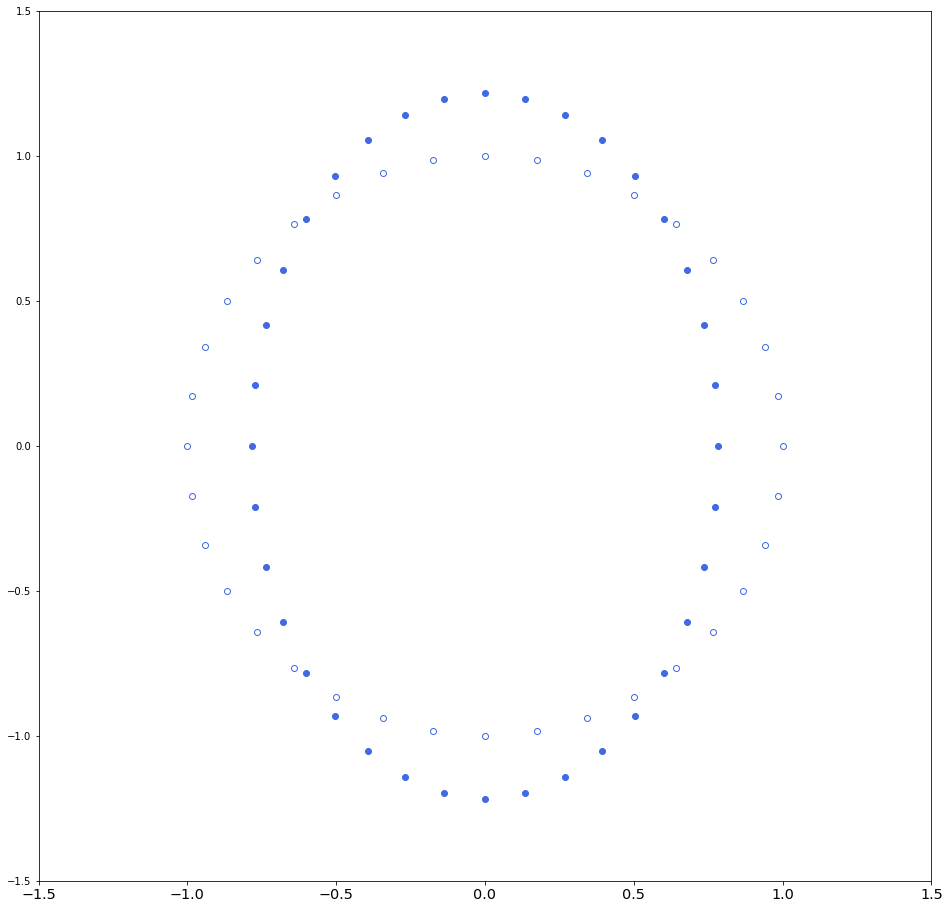

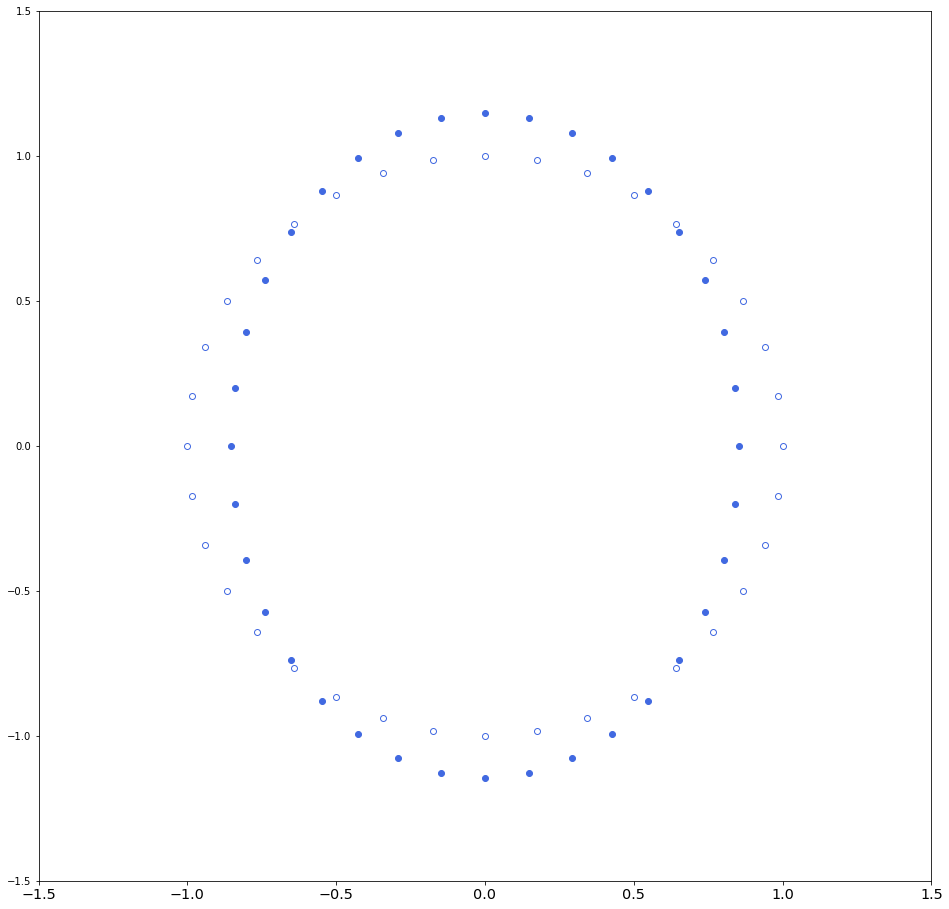

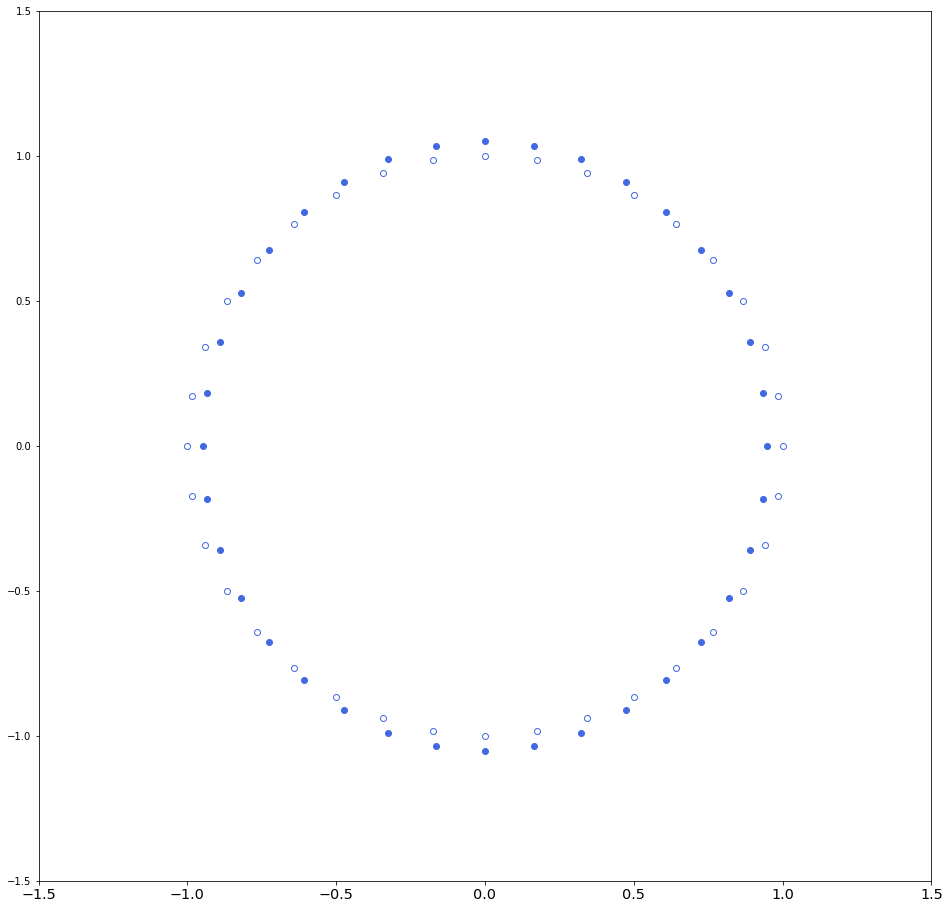

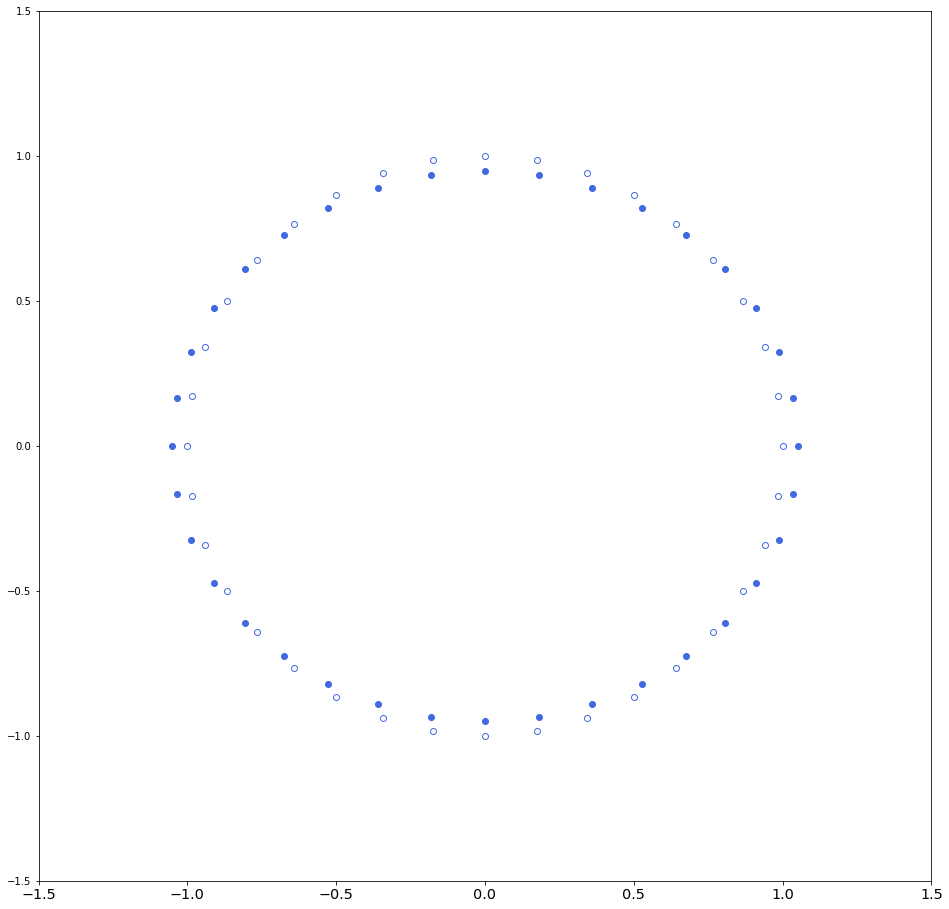

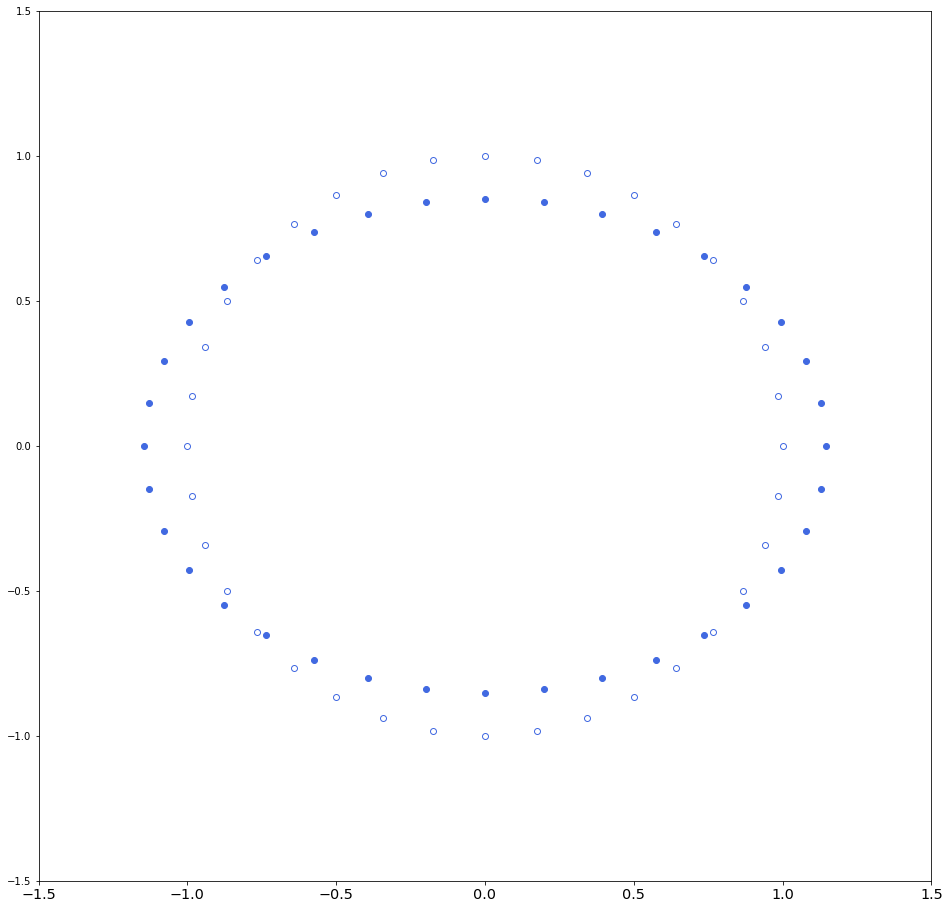

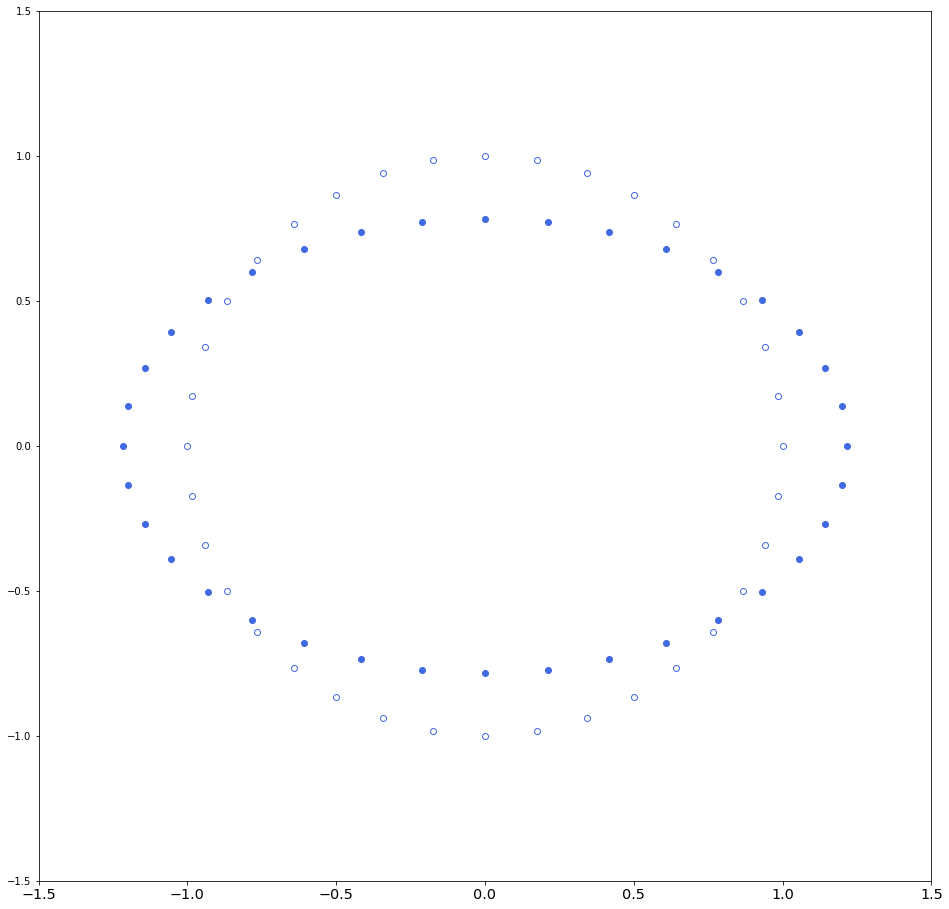

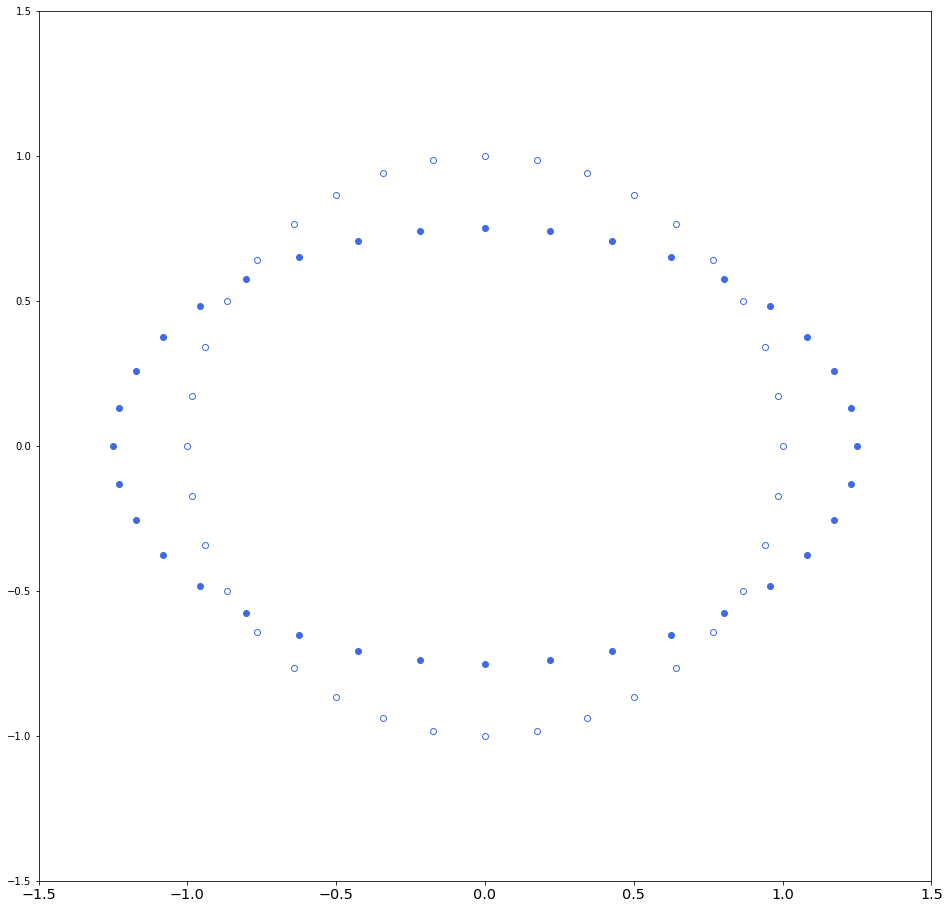

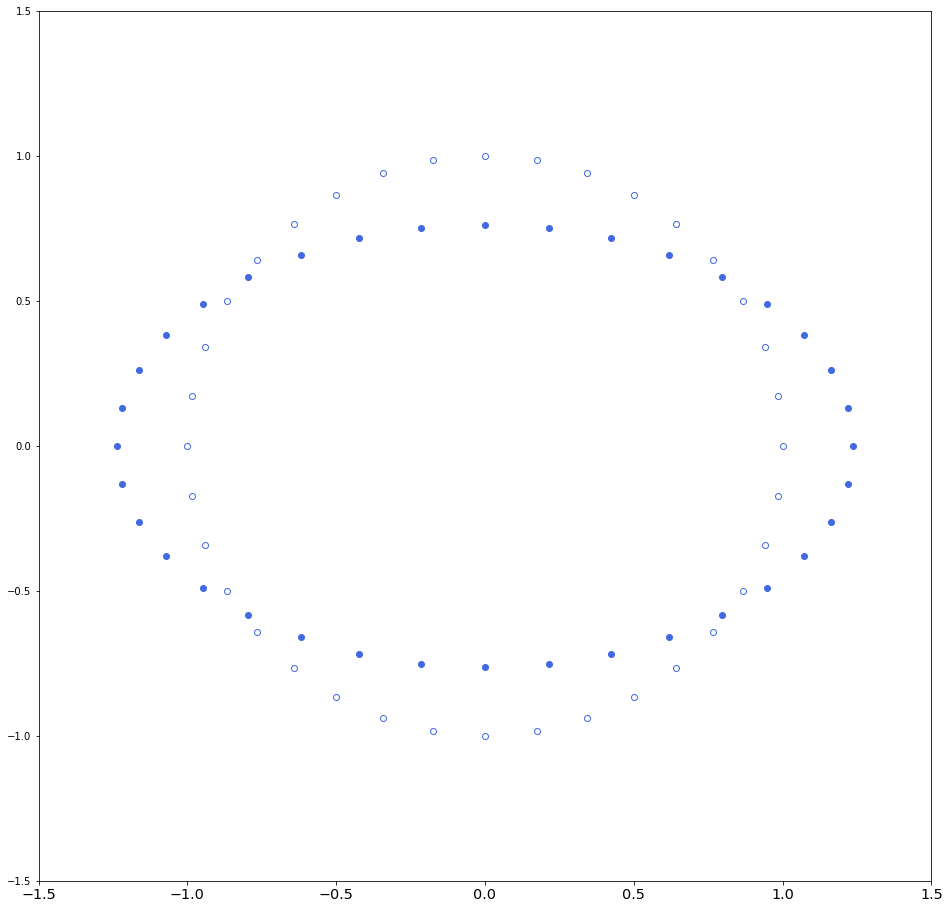

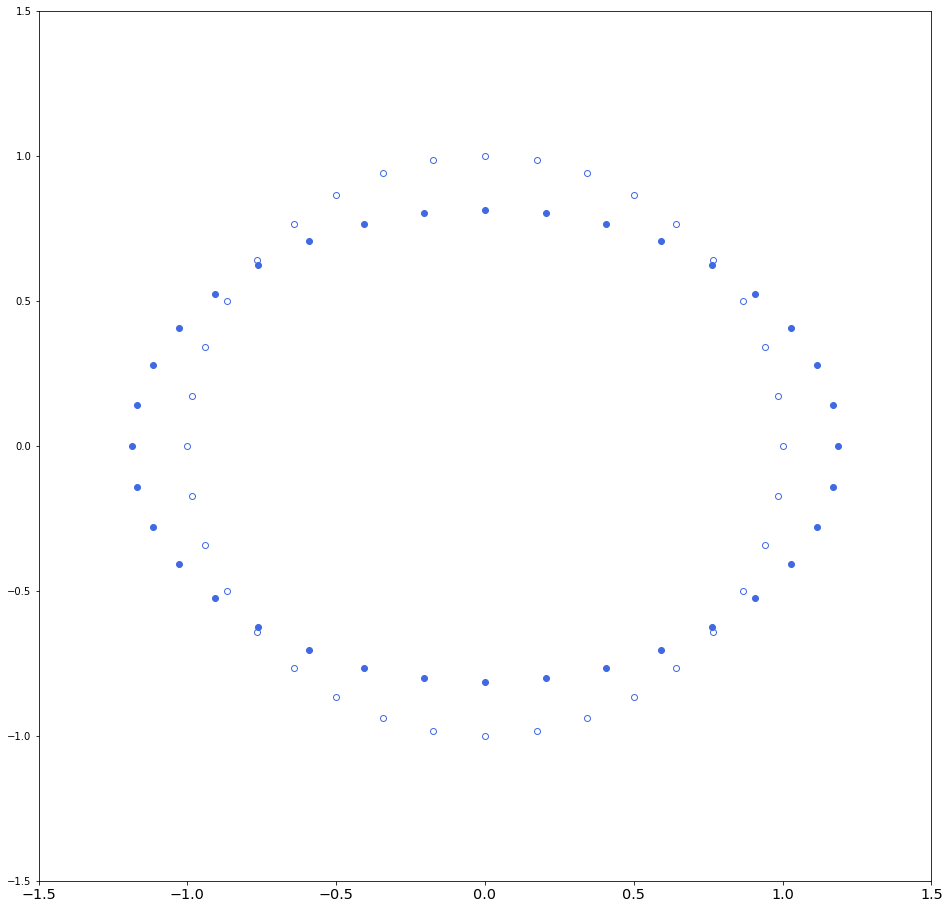

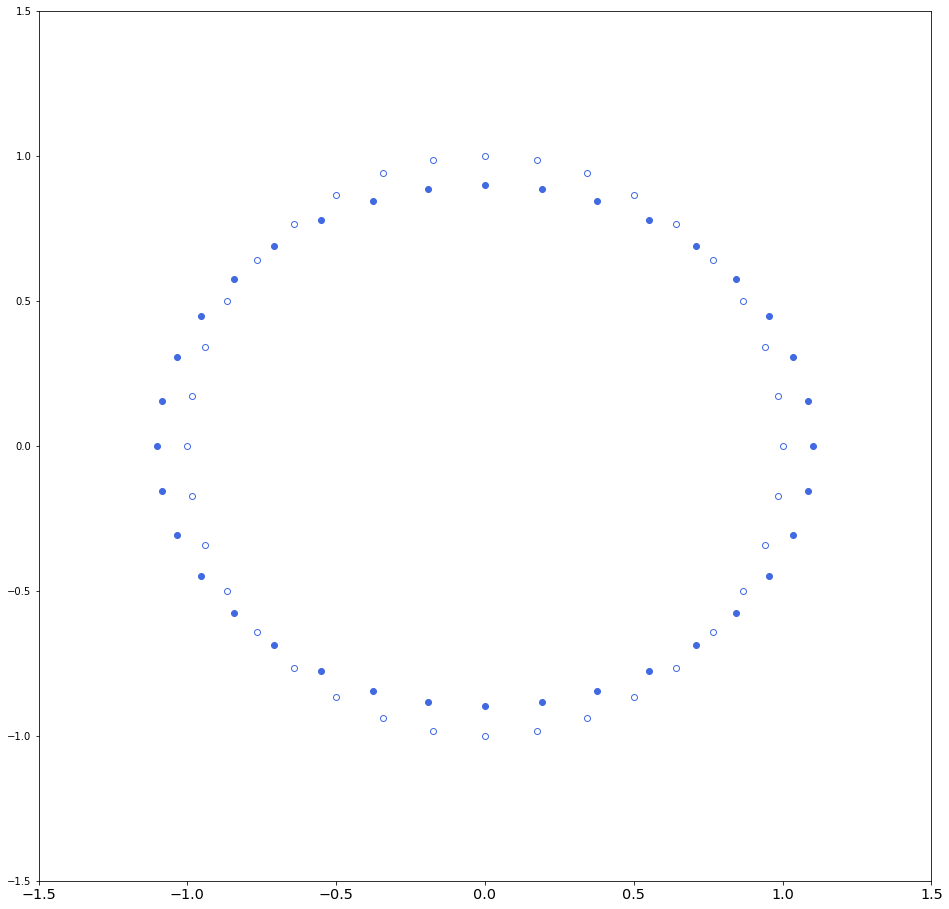

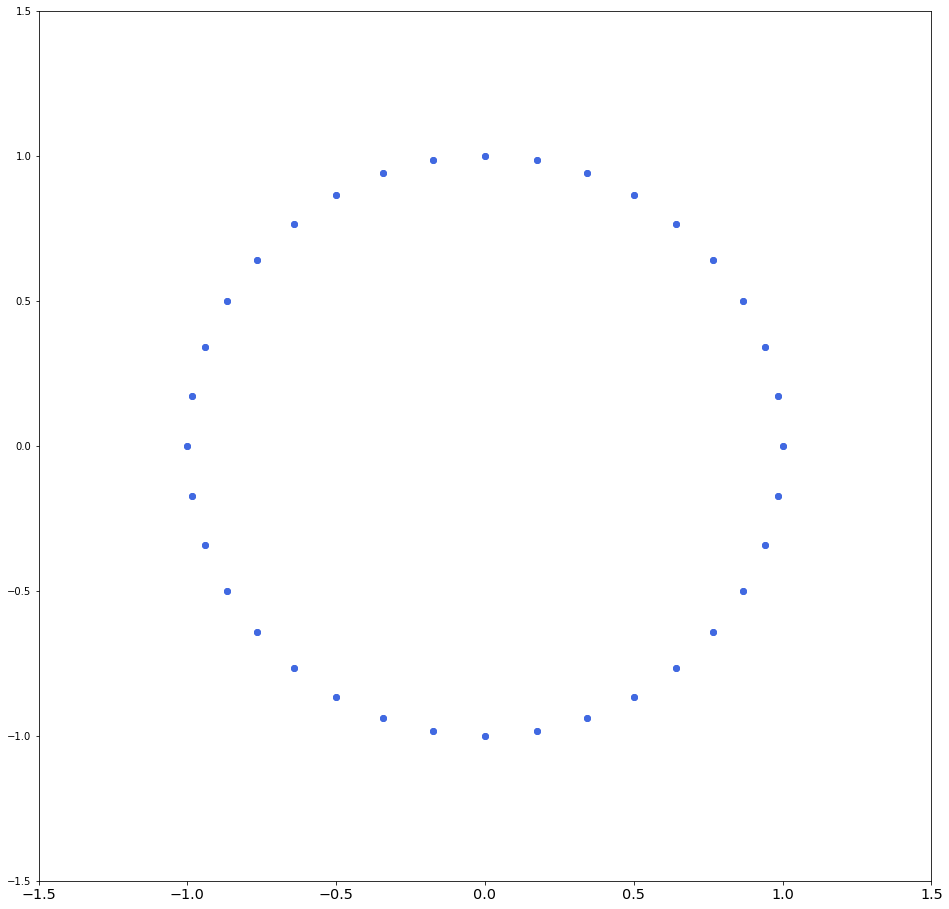

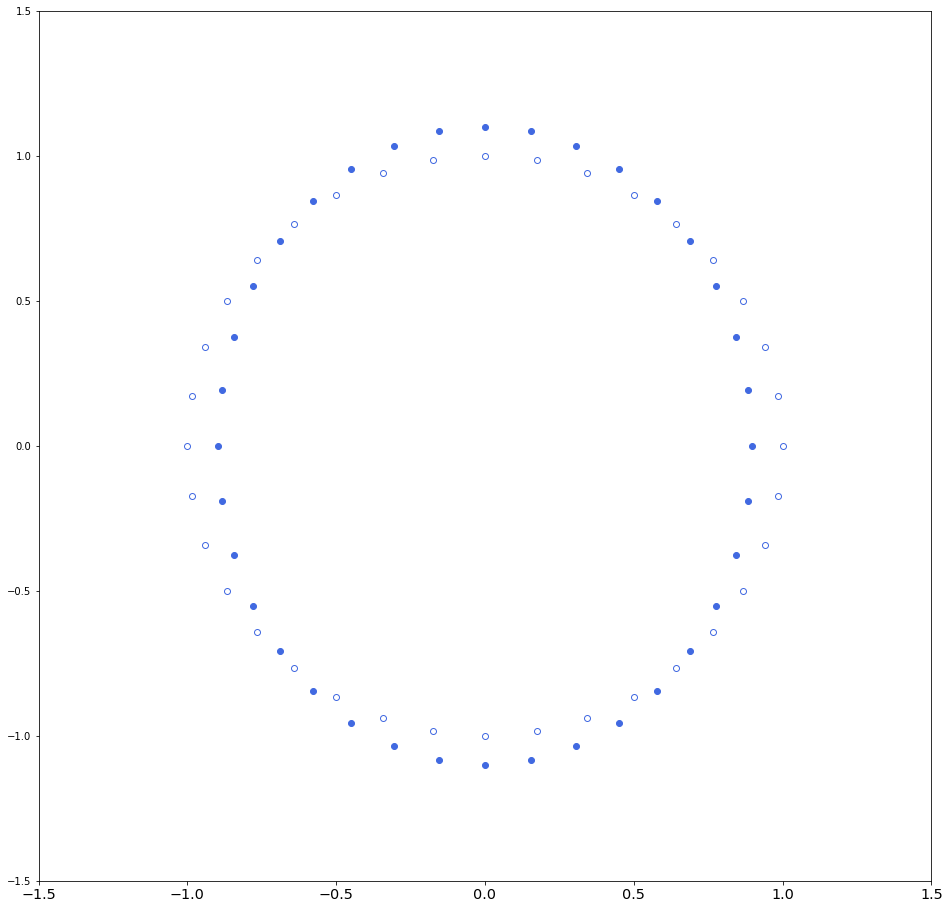

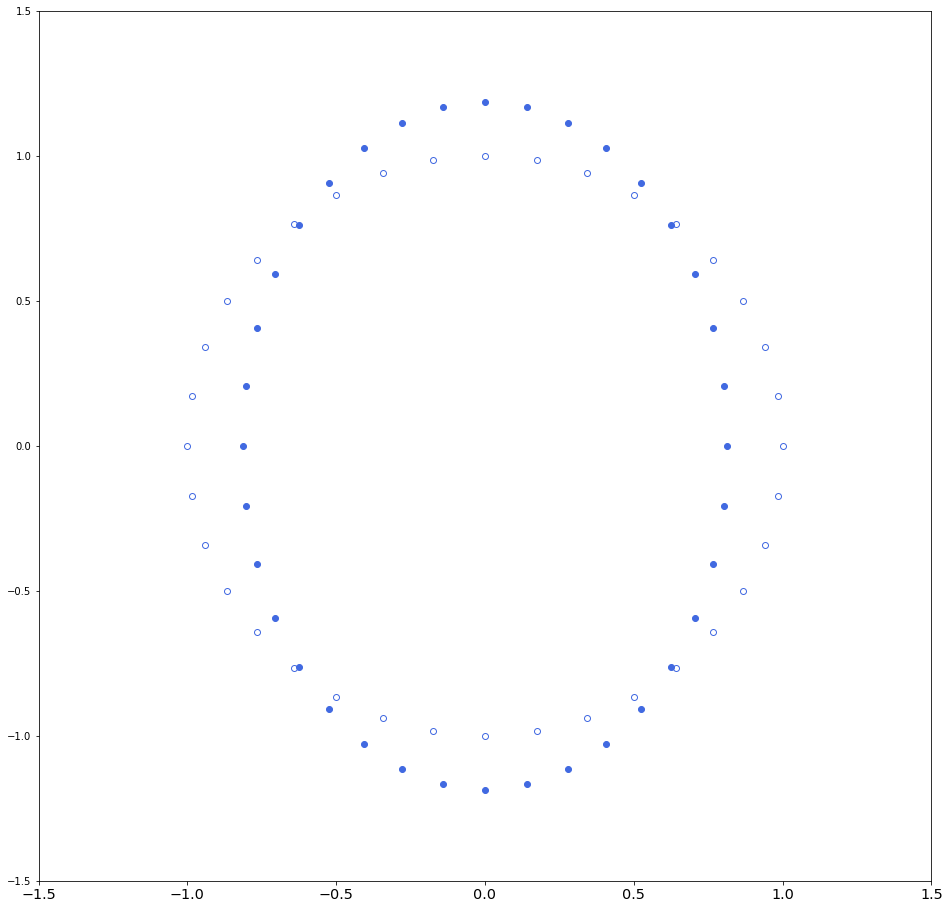

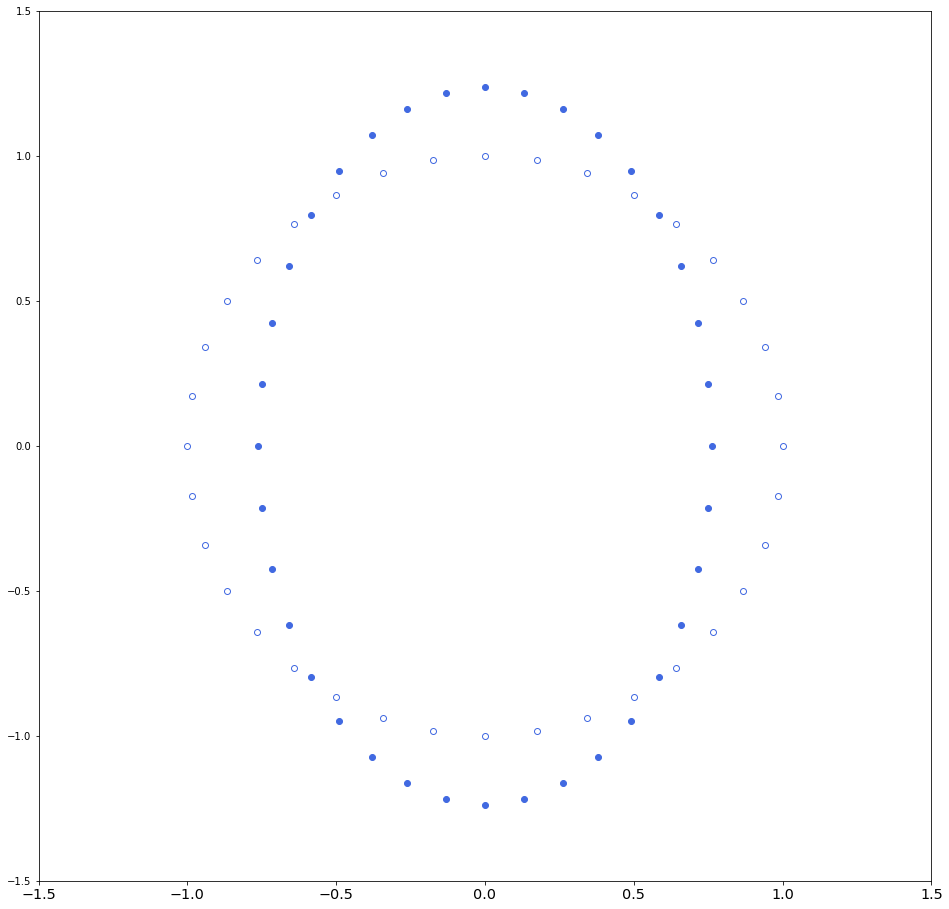

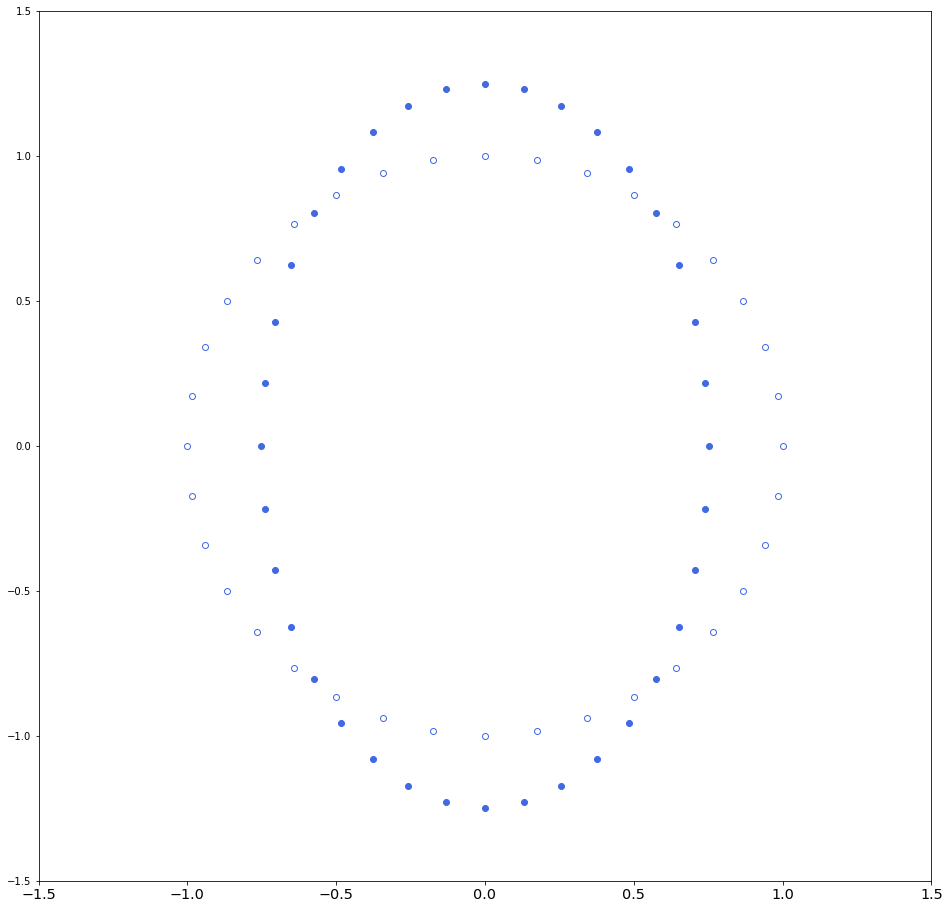

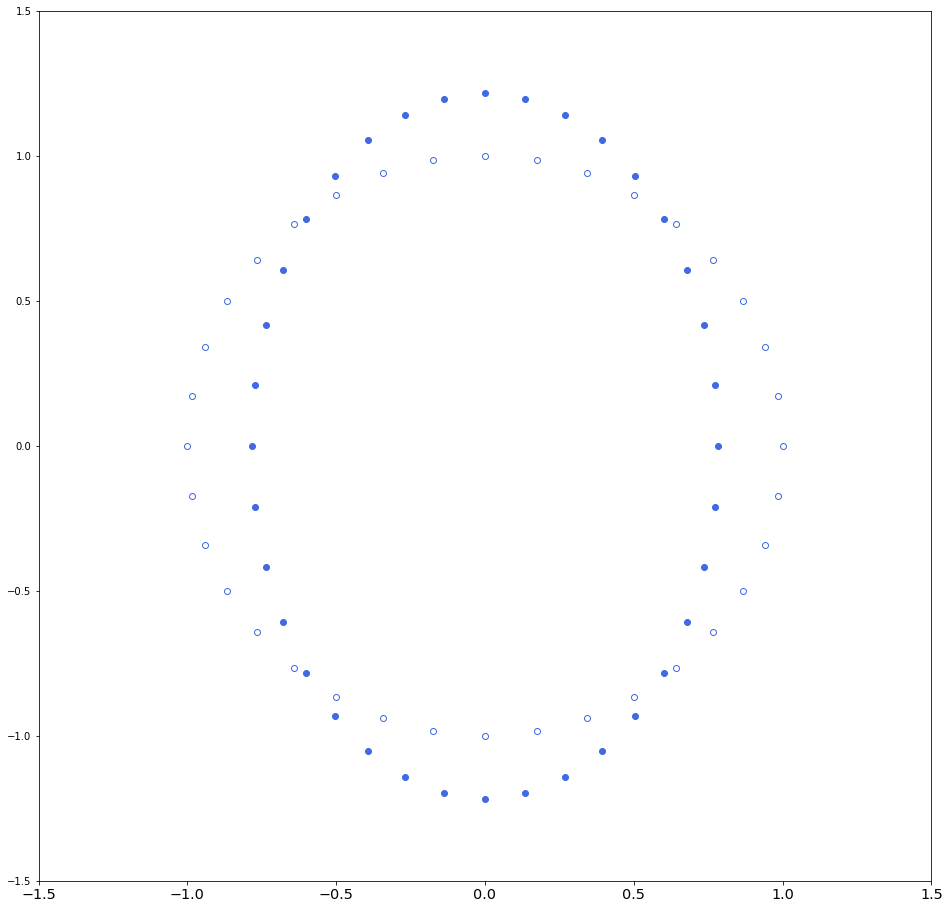

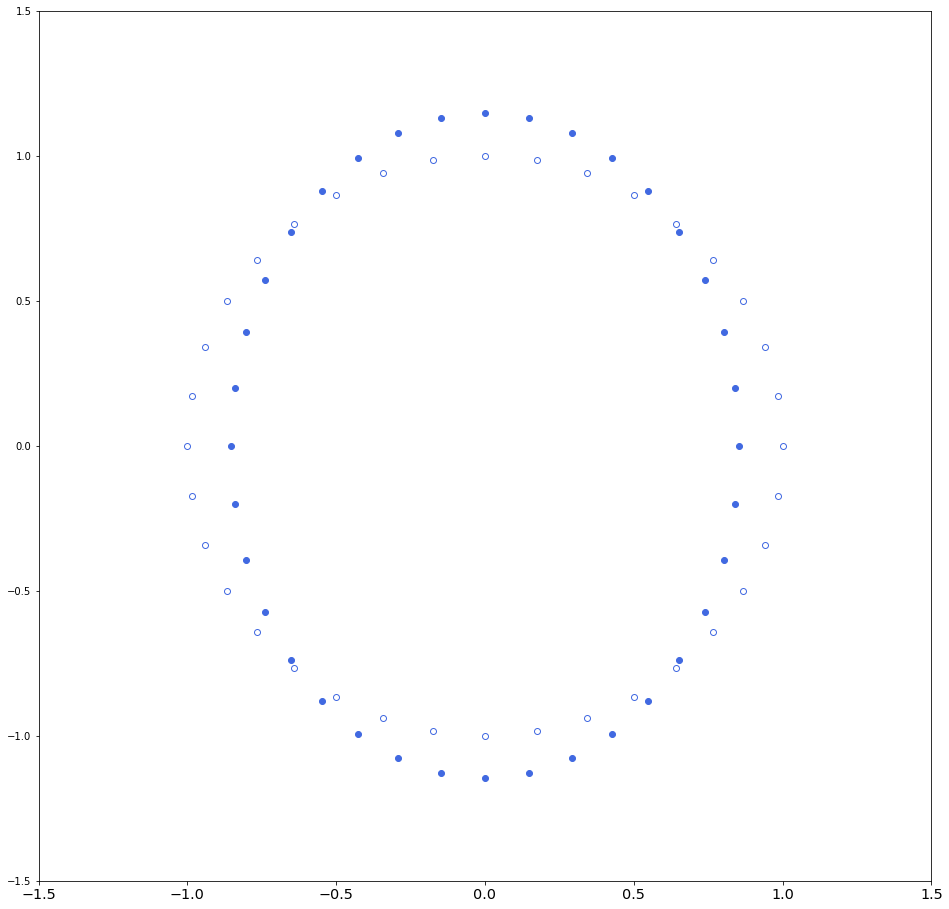

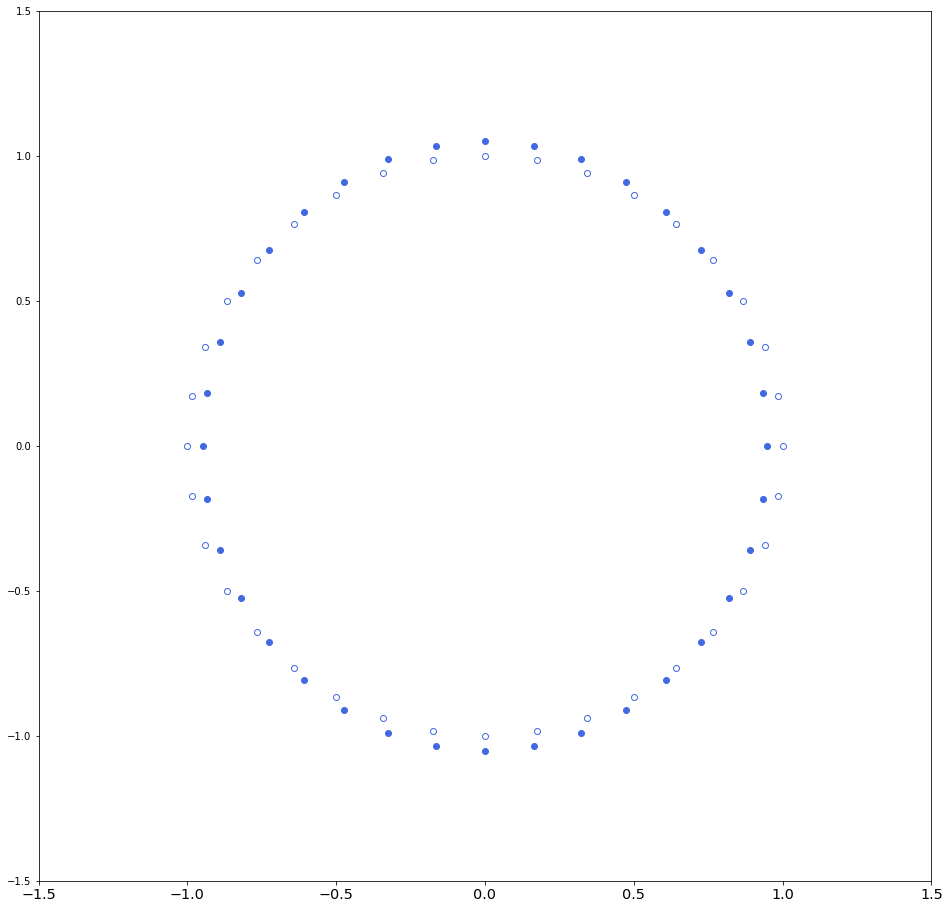

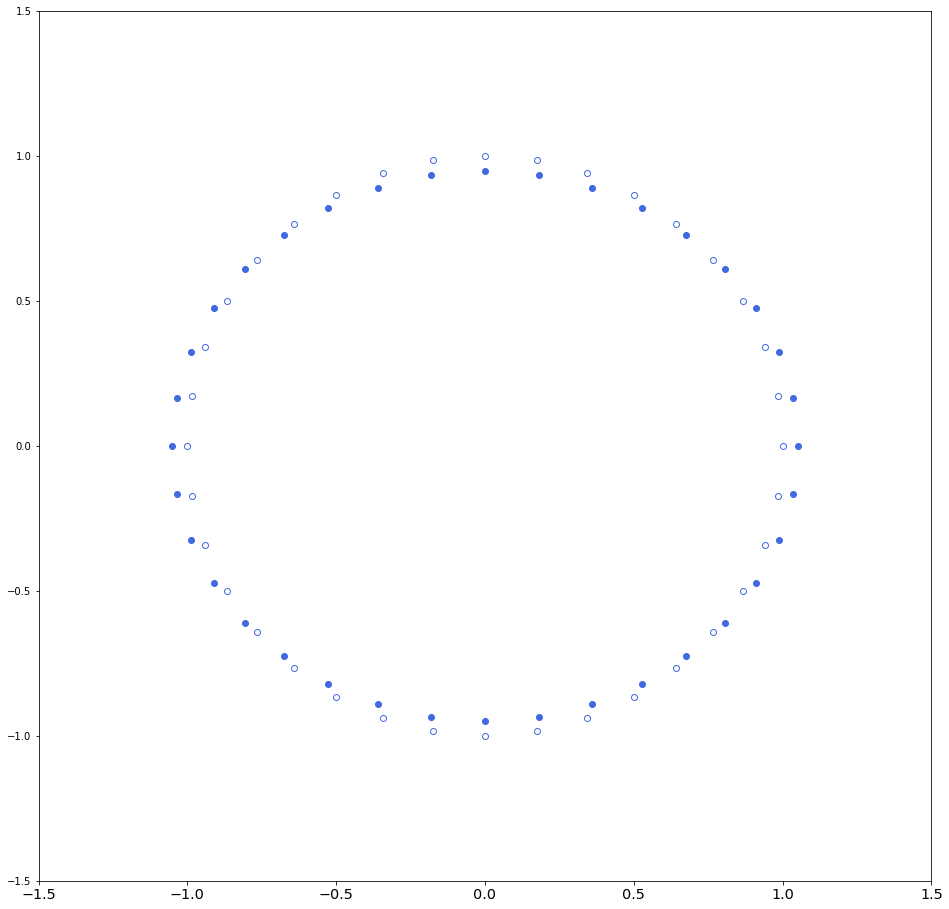

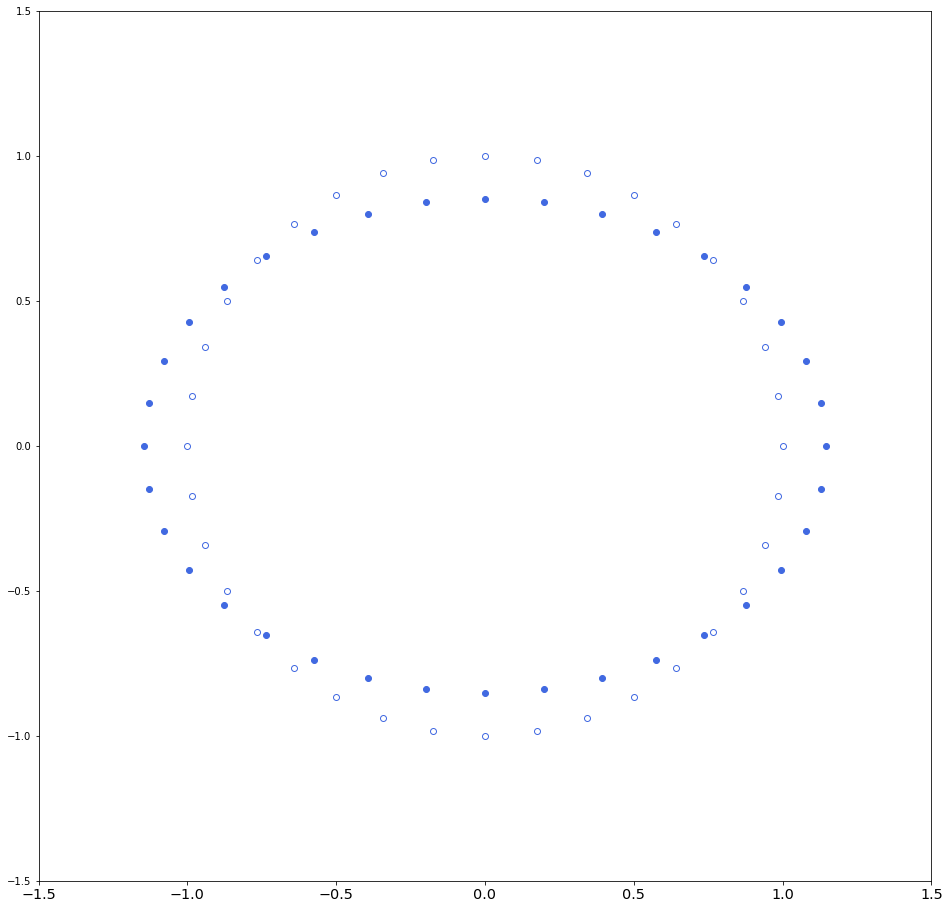

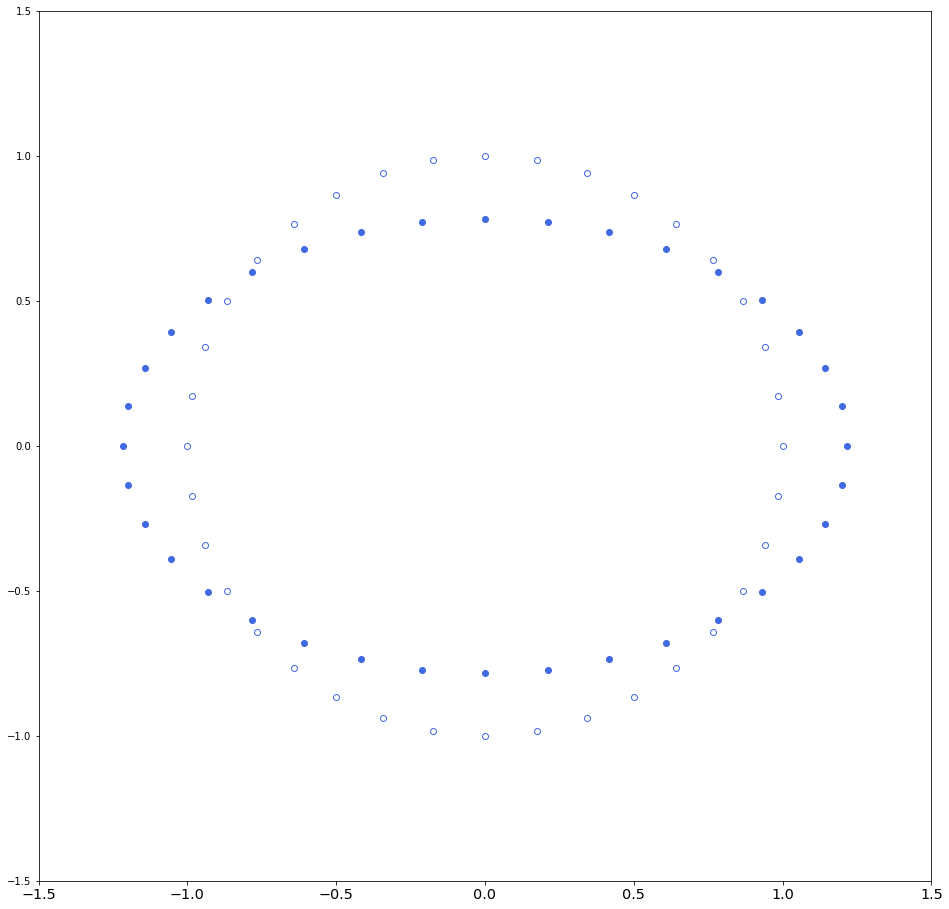

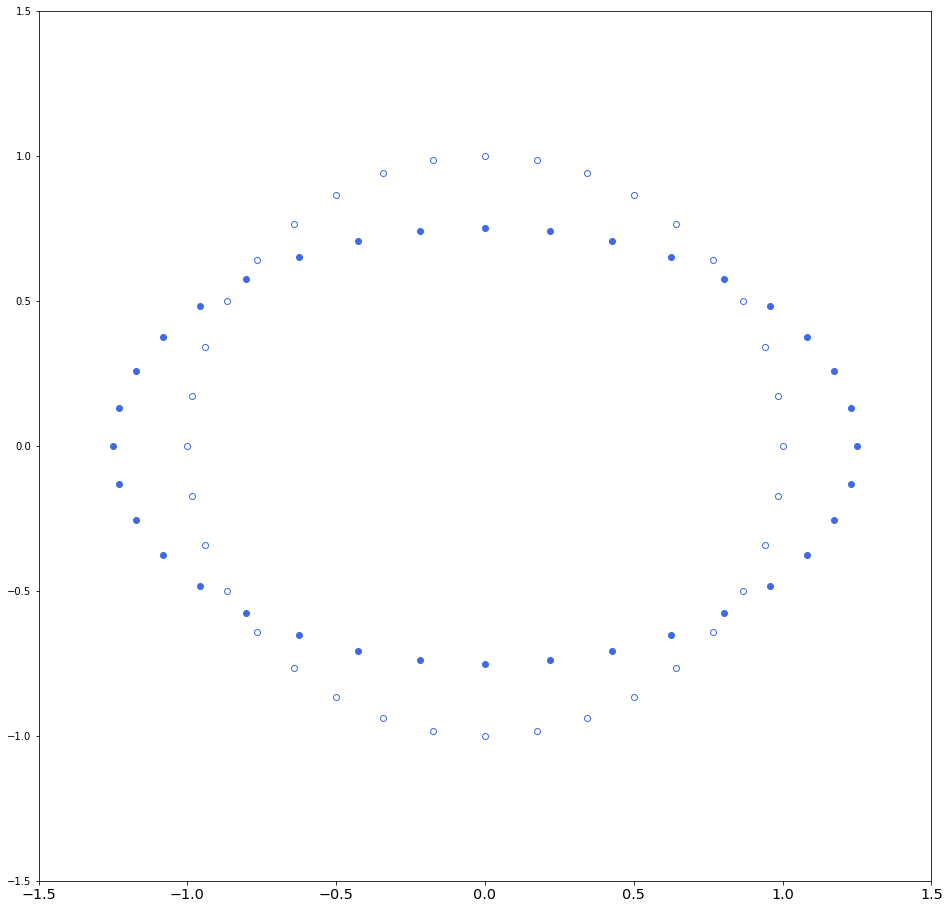

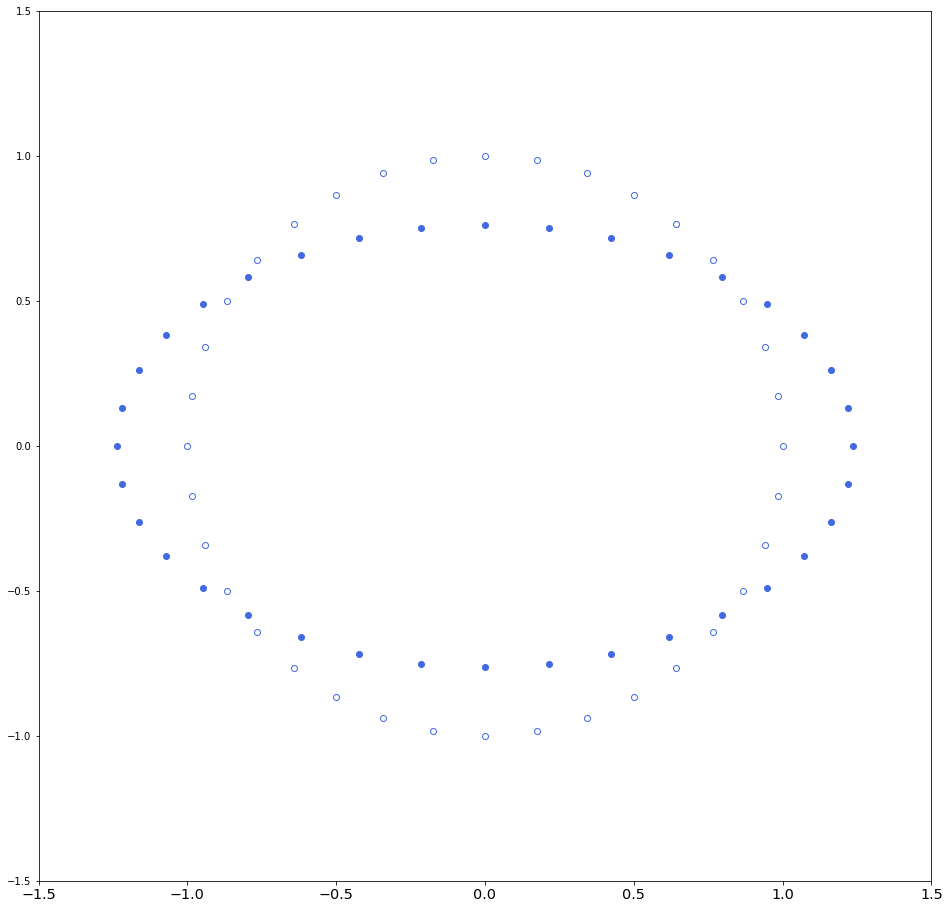

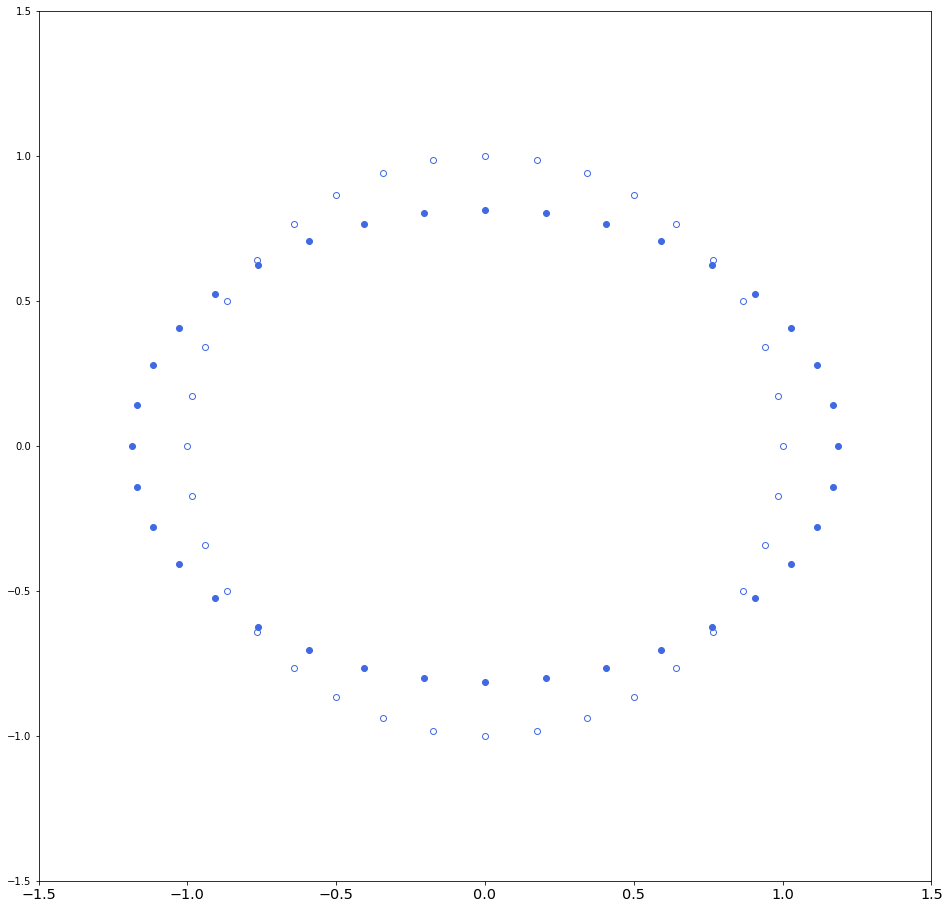

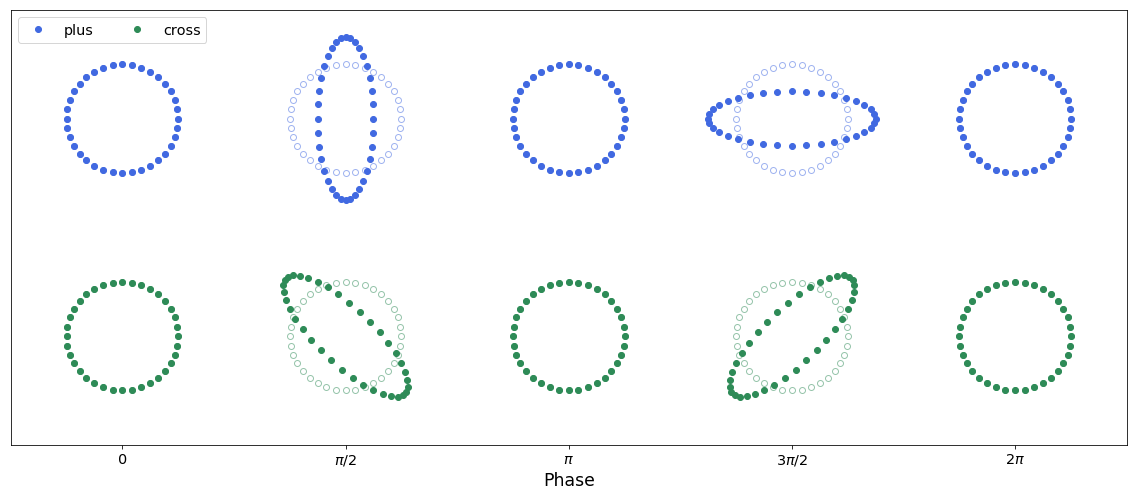

In [10]:
plus = 0.5
cross = 0.0
phasediff = 0
frequency = 1
duration = 2
fps=30

files = []

for i in range(fps*duration - 1):
    files.append('./Circles/{0}.png'.format(i))
    _ = create_ring(plus, cross, frequency, 1.*duration*i/fps, phasediff=phasediff, filename=files[-1])

create_gif(files, duration/fps, filename='./Circle_{0}plus_{1}cross_{2:.2f}phasediff.gif'.format(plus, cross, phasediff))

phases = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
plabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plus = [1, 0]
cross = [0, 1]
label = ['plus', 'cross']
color = ['royalblue', 'seagreen']

points0 = np.zeros((2, 36))
points0[0, :] = np.sin(2*np.pi*np.arange(36)/36)
points0[1, :] = np.cos(2*np.pi*np.arange(36)/36)

plt.figure(figsize=[(len(phases)-1)*4 + 4, (len(plus)-1)*4 + 4])
plt.rc('xtick',labelsize='x-large')
plt.rc('legend',fancybox=True)
plt.rc('legend',fontsize='x-large')
plt.xlim([-2, (len(phases)-1)*4 + 2])
plt.ylim([-(len(plus)-1)*4 - 2, 2])
for i in range(len(phases)):
    for j in range(len(plus)):
        points = create_ring(plus[j], cross[j], frequency, 0, phasestart=phases[i] + np.pi/2)
        plt.plot(points0[0, :] + i*4, points0[1, :] - j*4, 'o', c=color[j], mfc='none', alpha=0.5)
        if i == 0:
            plt.plot(points[0, :] + i*4, points[1, :] - j*4, 'o', c=color[j], label=label[j])
        else:
            plt.plot(points[0, :] + i*4, points[1, :] - j*4, 'o', c=color[j])
plt.yticks([], [])
plt.xticks([i*4 for i in range(len(phases))], plabels)
plt.xlabel('Phase', fontsize='xx-large')
plt.legend(loc=2, ncol=2)

plt.savefig('Phases.pdf', bbox_inches='tight')